# WMAZE Behavioral Descriptives

## First Analysis 
### Counts, Performance, and RT for 
#### - A, B, C trials individually

In [1]:
import os
from os.path import join
import numpy as np
import pandas as pd
from glob import glob
from math import sqrt
%matplotlib inline
import seaborn as sns
sns.set_palette('muted')
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import simps, trapz

In [2]:
subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_003', 'WMAZE_004', 'WMAZE_005',
        'WMAZE_006', 'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

stim_sets = ['set1', 'set2', 'set3']

count_table = {}
ctstd_table = {}
rt_table = {}
rtstd_table = {}

for sub in subs:
    ct_dict = {}
    rt_dict = {}
    sub_dir = '/home/data/madlab/Mattfeld_WMAZE/behav/{0}/'.format(sub)
    dir_file = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub)))    
    dir_file.sort() 

    for i, curr_set in enumerate(stim_sets):

        run1 = pd.read_table(dir_file[i * 2])
        run2 = pd.read_table(dir_file[i * 2 + 1])
      
        run1_trialtype = run1['TrialType'].values
        run1_correct = run1['Correct'].values 
        run1_response = run1['Resp'].values
        
        run2_trialtype = run2['TrialType'].values
        run2_correct = run2['Correct'].values
        run2_response = run2['Resp'].values        
        
        run1_A_corr = np.where((run1_trialtype == 'A') & (run1_correct == 1))
        run1_B_corr = np.where((run1_trialtype == 'B') & (run1_correct == 1))
        run1_C_corr = np.where((run1_trialtype == 'C') & (run1_correct == 1))
        run1_A_incorr = np.where((run1_trialtype == 'A') & (run1_correct == 0))
        run1_B_incorr = np.where((run1_trialtype == 'B') & (run1_correct == 0))
        run1_C_incorr = np.where((run1_trialtype == 'C') & (run1_correct == 0))
        run1_BL = np.where((run1_trialtype == 'BL') & (run1_response != 'NR'))
        run1_NR = np.where((run1_response == 'NR'))
        
        run2_A_corr = np.where((run2_trialtype == 'A') & (run2_correct == 1))
        run2_B_corr = np.where((run2_trialtype == 'B') & (run2_correct == 1))
        run2_C_corr = np.where((run2_trialtype == 'C') & (run2_correct == 1))
        run2_A_incorr = np.where((run2_trialtype == 'A') & (run2_correct == 0))
        run2_B_incorr = np.where((run2_trialtype == 'B') & (run2_correct == 0))
        run2_C_incorr = np.where((run2_trialtype == 'C') & (run2_correct == 0))
        run2_BL = np.where((run2_trialtype == 'BL') & (run2_response != 'NR'))
        run2_NR = np.where(run2_response == 'NR')
   
        run1_RTs = run1['RT']
        run2_RTs = run2['RT']    
        
        run1_A_corr_RTs = run1_RTs.values[run1_A_corr]
        run1_B_corr_RTs = run1_RTs.values[run1_B_corr]
        run1_C_corr_RTs = run1_RTs.values[run1_C_corr]
        run1_A_incorr_RTs = run1_RTs.values[run1_A_incorr]
        run1_B_incorr_RTs = run1_RTs.values[run1_B_incorr]
        run1_C_incorr_RTs = run1_RTs.values[run1_C_incorr]
        run1_BL_RTs = run1_RTs.values[run1_BL]
        run1_NR_RTs = run1_RTs.values[run1_NR]
        
        run2_A_corr_RTs = run2_RTs.values[run2_A_corr]
        run2_B_corr_RTs = run2_RTs.values[run2_B_corr]
        run2_C_corr_RTs = run2_RTs.values[run2_C_corr]
        run2_A_incorr_RTs = run2_RTs.values[run2_A_incorr]
        run2_B_incorr_RTs = run2_RTs.values[run2_B_incorr]
        run2_C_incorr_RTs = run2_RTs.values[run2_C_incorr]
        run2_BL_RTs = run2_RTs.values[run2_BL]
        run2_NR_RTs = run2_RTs.values[run2_NR]
                      
        #Creation of a flexible naming convention for dictionary keys & contents        
        for curr_type in ['A_corr', 'B_corr', 'C_corr', 'A_incorr', 'B_incorr', 'C_incorr', 'BL', 'NR']:
            curr_name = '{0}'.format(curr_type)
            rt_name = '{0}_RTs'.format(curr_type)
            if not curr_name in ct_dict:
                ct_dict[curr_name] = []
            ct_dict[curr_name].append(len(eval('run1_' + curr_name)[0]))
            ct_dict[curr_name].append(len(eval('run2_' + curr_name)[0]))
            if not rt_name in rt_dict:
                rt_dict[rt_name] = []
            rt_eval = eval('run1_' + rt_name)
            # Remove NaN from counts
            rt_notNaN = np.where(rt_eval >= 0)
            rt_notNaN = rt_eval[rt_notNaN[0]]           
            if rt_notNaN.shape[0] == 0:
                rt_dict[rt_name].append(None)                       
            else:
                rt_dict[rt_name].append(np.average(rt_notNaN))

            rt_eval = eval('run2_' + rt_name)
            # Remove NaN from RT calculations
            rt_notNaN = np.where(rt_eval >= 0)
            rt_notNaN = rt_eval[rt_notNaN[0]]           
            if rt_notNaN.shape[0] == 0:
                rt_dict[rt_name].append(None)                       
            else:
                rt_dict[rt_name].append(np.average(rt_notNaN))    
             
    for key in ct_dict:
        ct_dict[key] = np.sum(ct_dict[key])
        if not key in count_table:
            count_table[key] = []
        count_table[key].append(ct_dict[key])
              
    for key in rt_dict:
        rt_notNONE = np.where(np.array(rt_dict[key]) >= 0)
        rt_dict[key] = np.average(np.array(rt_dict[key])[rt_notNONE[0]])
        if not key in rt_table:
            rt_table[key] = []
        rt_table[key].append(rt_dict[key])

df_1 = pd.DataFrame(count_table, index = subs) 
df2_1 = pd.DataFrame(rt_table, index = subs) 

/home/data/madlab/envs/ebc_env/lib/python3.6/site-packages/ipykernel_launcher.py:84: RuntimeWarning: invalid value encountered in greater_equal
/home/data/madlab/envs/ebc_env/lib/python3.6/site-packages/ipykernel_launcher.py:93: RuntimeWarning: invalid value encountered in greater_equal
/home/data/madlab/envs/ebc_env/lib/python3.6/site-packages/ipykernel_launcher.py:48: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/data/madlab/envs/ebc_env/lib/python3.6/site-packages/ipykernel_launcher.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/data/madlab/envs/ebc_env/lib/python3.6/site-packages/ipykernel_launcher.py:39: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/home/data/madlab/envs/ebc_env/lib/python3.6/site-packages/ipykernel_launcher.p

TypeError: '>=' not supported between instances of 'NoneType' and 'int'

In [4]:
ct_avg = {}
ct_std = {}
for curr_key in count_table:
    ct_avg[curr_key] = np.average(count_table[curr_key])
    ct_std[curr_key] = np.std(count_table[curr_key])    
count_average_1 = pd.DataFrame(ct_avg, index = (1,))
count_std_1 = pd.DataFrame(ct_std, index = (1,))

In [5]:
count_average_1

,A_corr,A_incorr,BL,B_corr,B_incorr,C_corr,C_incorr,NR
1,219.8,18.05,235.8,179.05,56.3,222.0,15.4,13.6


In [6]:
count_std_1

,A_corr,A_incorr,BL,B_corr,B_incorr,C_corr,C_incorr,NR
1,8.016234,7.31078,3.140064,17.928957,18.490809,10.173495,9.313431,5.257376


In [7]:
df_1

,A_corr,A_incorr,BL,B_corr,B_incorr,C_corr,C_incorr,NR
WMAZE_001,219,19,235,190,48,229,10,10
WMAZE_002,218,17,235,204,27,226,10,23
WMAZE_003,213,22,239,179,53,223,14,17
WMAZE_004,215,22,239,182,54,226,12,10
WMAZE_005,226,13,236,191,47,204,35,8
WMAZE_006,218,19,231,176,61,232,8,15
WMAZE_007,210,27,236,168,68,228,11,12
WMAZE_008,221,19,240,170,65,205,33,7
WMAZE_009,213,23,233,166,71,225,13,16
WMAZE_010,225,14,236,129,107,216,16,17


A ACC: 0.924037050166
0.0309805560626
B ACC: 0.761003926661
0.07818949198
C ACC: 0.935022007039
0.0394437227748

Test for Normacy of A, B, & C ACC Distributions
A Normal Test 2: (0.8370134830474854, 0.0032545248977839947)
B Normal Test 2: (0.9396852254867554, 0.2365163415670395)
C Normal Test 2: (0.8444696068763733, 0.004312132019549608)

**A & C are non-normally distributed -- use non-parametric Wilcoxon Ranked-Sign Test
A vs C: (64.0, 0.21221142185606556)
A vs B: (0.0, 8.8574576878635474e-05)
C vs B: (0.0, 8.8574576878635474e-05)


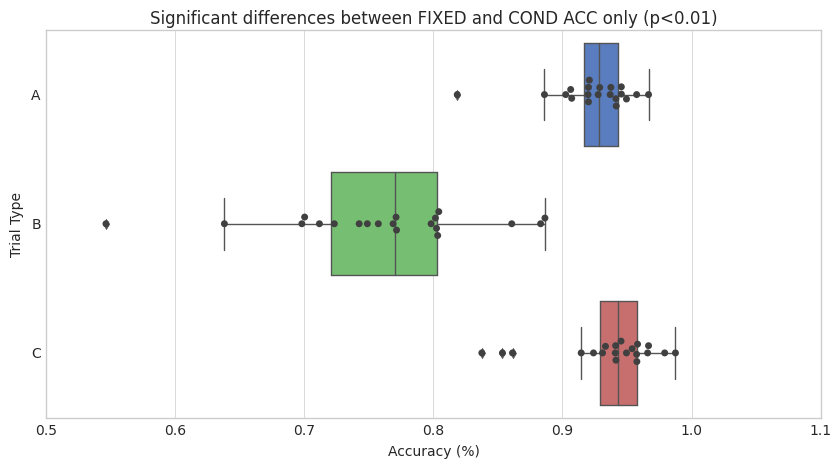

In [9]:
a_acc = df_1['A_corr']/(df_1['A_corr']+df_1['A_incorr'])
print 'A ACC:', np.mean(a_acc)
print np.std(a_acc)
b_acc = df_1['B_corr']/(df_1['B_corr']+df_1['B_incorr'])
print 'B ACC:', np.mean(b_acc)
print np.std(b_acc)
c_acc = df_1['C_corr']/(df_1['C_corr']+df_1['C_incorr'])
print 'C ACC:', np.mean(c_acc)
print np.std(c_acc)
print ""
print "Test for Normacy of A, B, & C ACC Distributions"
print "A Normal Test 2:", stats.shapiro(a_acc)
print "B Normal Test 2:", stats.shapiro(b_acc)
print "C Normal Test 2:", stats.shapiro(c_acc)
print ""
print "**A & C are non-normally distributed -- use non-parametric Wilcoxon Ranked-Sign Test"
print "A vs C:", stats.wilcoxon(a_acc, c_acc)[:]
print "A vs B:", stats.wilcoxon(a_acc, b_acc)[:]
print "C vs B:", stats.wilcoxon(c_acc, b_acc)[:]


N = 3
conditions = ['A', 'B', 'C']

A_tot = [df_1['A_corr'], df_1['A_incorr']]
A_tot = pd.concat(A_tot)
B_tot = [df_1['B_corr'], df_1['B_incorr']]
B_tot = pd.concat(B_tot)
C_tot = [df_1['C_corr'], df_1['C_incorr']]
C_tot = pd.concat(C_tot)

means_allsubjs = [df_1['A_corr']/(df_1['A_corr'] + df_1['A_incorr']),
                  df_1['B_corr']/(df_1['B_corr'] + df_1['B_incorr']),
                  df_1['C_corr']/(df_1['C_corr'] + df_1['C_incorr'])]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=means_allsubjs, orient='h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Accuracy (%)")
ax.set_title('Significant differences between FIXED and COND ACC only (p<0.01)')
#plt.savefig("/home/arenf001/accuracy_fig.jpg", dpi = 1080)
plt.show()

# Significant differences between fixed and conditional, but no significant difference between both fixed

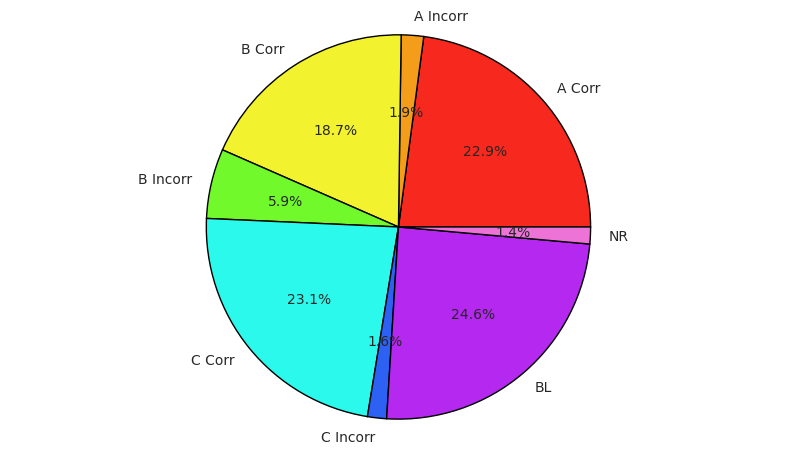

In [10]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie

N = 8
labels = ['A Corr', 'A Incorr', 'B Corr', 'B Incorr', 'C Corr', 'C Incorr', 'BL', 'NR']
colors = ['#f7281d', '#f49d1a', '#f2f22e', '#71f92c', '#2bf9eb', '#2c61f4', '#b428ef', '#ed74d6']

means_allsubjs = [np.mean(df_1['A_corr'])/960, 
                  np.mean(df_1['A_incorr'])/960,
                  np.mean(df_1['B_corr'])/960, 
                  np.mean(df_1['B_incorr'])/960,
                  np.mean(df_1['C_corr'])/960, 
                  np.mean(df_1['C_incorr'])/960,
                  np.mean(df_1['BL'])/960,
                  np.mean(df_1['NR'])/960]
fig, ax = plt.subplots(figsize = (10,5))
ax.pie(means_allsubjs, labels = labels, colors = colors, autopct='%1.1f%%', startangle = 0)
ax.axis('equal')
plt.show()

# Reaction Time

In [11]:
rt_average ={}
rt_std = {}

for curr_key in rt_table:
    rt_average[curr_key] = np.average(rt_table[curr_key])
    rt_std[curr_key] = np.std(rt_table[curr_key])
RT_average_1 = pd.DataFrame(rt_average, index = (1,))
RT_std_1 = pd.DataFrame(rt_std, index = (1,))

In [12]:
RT_average_1

,A_corr_RTs,A_incorr_RTs,BL_RTs,B_corr_RTs,B_incorr_RTs,C_corr_RTs,C_incorr_RTs,NR_RTs
1,0.575467,0.584202,0.660102,0.609197,0.655332,0.565393,0.610258,1.0


In [13]:
RT_std_1

,A_corr_RTs,A_incorr_RTs,BL_RTs,B_corr_RTs,B_incorr_RTs,C_corr_RTs,C_incorr_RTs,NR_RTs
1,0.035303,0.048935,0.039761,0.039465,0.0471,0.034205,0.068858,0.0


In [14]:
df2_1

,A_corr_RTs,A_incorr_RTs,BL_RTs,B_corr_RTs,B_incorr_RTs,C_corr_RTs,C_incorr_RTs,NR_RTs
WMAZE_001,0.561090,0.523692,0.655910,0.612143,0.666230,0.538873,0.577858,True
WMAZE_002,0.582256,0.604050,0.621001,0.568777,0.713987,0.547069,0.557852,True
WMAZE_003,0.628373,0.667204,0.665740,0.654225,0.706909,0.602218,0.733179,True
WMAZE_004,0.574643,0.606347,0.610969,0.598331,0.660192,0.549537,0.704273,True
WMAZE_005,0.604686,0.580436,0.679770,0.623309,0.669855,0.613699,0.678938,True
WMAZE_006,0.638110,0.555097,0.702728,0.602315,0.642592,0.558309,0.582505,True
WMAZE_007,0.540883,0.512160,0.668984,0.594632,0.649797,0.510729,0.537150,True
WMAZE_008,0.511321,0.543765,0.579429,0.536982,0.558380,0.531501,0.502873,True
WMAZE_009,0.599893,0.630823,0.739824,0.636931,0.695901,0.595680,0.575132,True
WMAZE_010,0.592979,0.577158,0.631175,0.615212,0.630917,0.574260,0.656966,True


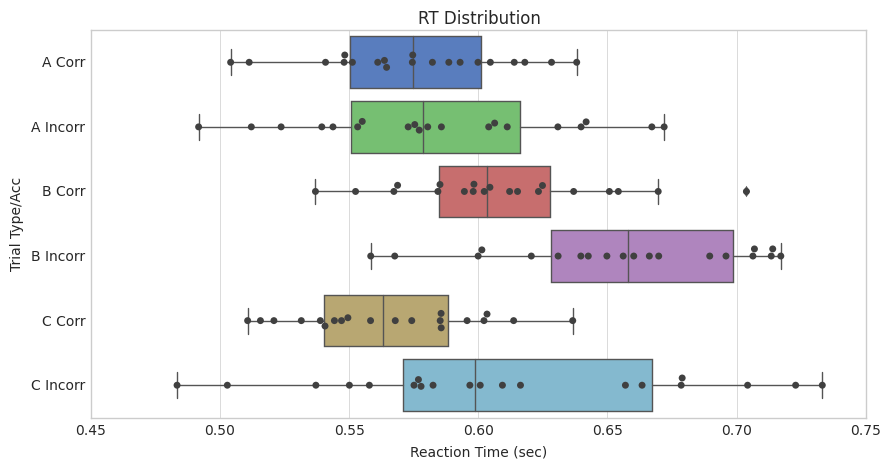

In [15]:
N = 6
conditions = ['A Corr', 'A Incorr', 'B Corr', 'B Incorr', 'C Corr', 'C Incorr']

means_allsubjs = [df2_1['A_corr_RTs'], df2_1['A_incorr_RTs'],
                  df2_1['B_corr_RTs'], df2_1['B_incorr_RTs'],
                  df2_1['C_corr_RTs'], df2_1['C_incorr_RTs']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=means_allsubjs, orient='h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type/Acc")
ax.set_xlabel("Reaction Time (sec)")
ax.set_title('RT Distribution')
plt.show()

A RT: 0.579834724814
0.036943154447

B RT: 0.632264188218
0.0390581076671

C RT: 0.587825302636
0.0464651841235

Test for Normacy of A, B, & C Distributions
A Normal Test 1: (0.8415002914011398, 0.65655412378810662)
A Normal Test 2: (0.9307777881622314, 0.1598304957151413)
B Normal Test 1: (0.74704590954103922, 0.68830518622740244)
B Normal Test 2: (0.9661468863487244, 0.6723423004150391)
C Normal Test 1: (1.2054880752225299, 0.54730774063959187)
C Normal Test 2: (0.9749106168746948, 0.8531758189201355)

*All distributionas are normal -- use parametric t-Test
A vs C: (-1.0860742693024439, 0.29103386368825479)
A vs B: (-9.4291475538938325, 1.3449399542782968e-08)
C vs B: (-5.0061596824307779, 7.8413925404552219e-05)


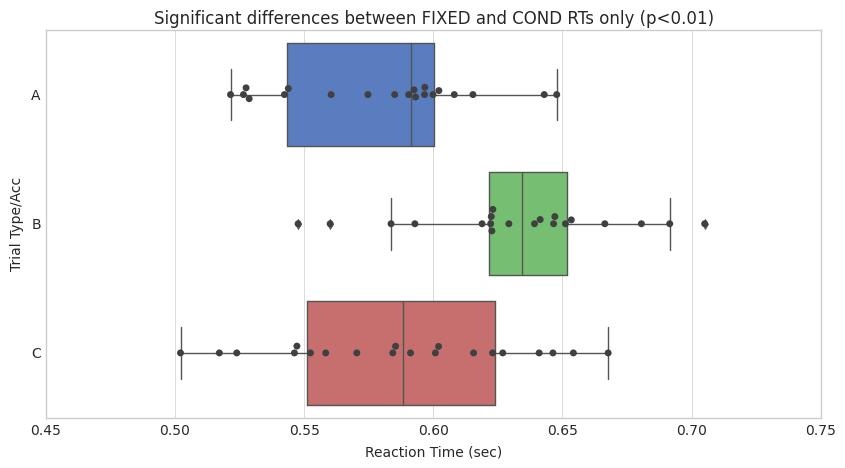

In [16]:
rt_dict={}
a_rt = df2_1[['A_corr_RTs', 'A_incorr_RTs']].mean(axis=1)
a_rt = np.array(a_rt)
print 'A RT:', np.mean(a_rt)
print np.std(a_rt)
print ""
b_rt = df2_1[['B_corr_RTs', 'B_incorr_RTs']].mean(axis=1)
b_rt = np.array(b_rt)
print 'B RT:', np.mean(b_rt)
print np.std(b_rt)
print ""
c_rt = df2_1[['C_corr_RTs', 'C_incorr_RTs']].mean(axis=1)
c_rt = np.array(c_rt)
print 'C RT:', np.mean(c_rt)
print np.std(c_rt)
print ""
print "Test for Normacy of A, B, & C Distributions"
print "A Normal Test 1:", stats.normaltest(a_rt)[:]
print "A Normal Test 2:", stats.shapiro(a_rt)
print "B Normal Test 1:", stats.normaltest(b_rt)[:]
print "B Normal Test 2:", stats.shapiro(b_rt)
print "C Normal Test 1:", stats.normaltest(c_rt)[:]
print "C Normal Test 2:", stats.shapiro(c_rt)
print ""
print "*All distributionas are normal -- use parametric t-Test"
print "A vs C:", stats.ttest_rel(a_rt, c_rt)[:]
print "A vs B:", stats.ttest_rel(a_rt, b_rt)[:]
print "C vs B:", stats.ttest_rel(c_rt, b_rt)[:]

N = 3
conditions = ['A', 'B', 'C']

means_allsubjs = [a_rt, b_rt, c_rt]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=means_allsubjs, orient='h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type/Acc")
ax.set_xlabel("Reaction Time (sec)")
ax.set_title('Significant differences between FIXED and COND RTs only (p<0.01)')
#plt.savefig("/home/arenf001/all_stim_RT.jpg", dpi = 850)
plt.show()

## Second Analysis 
### Counts, Performance, and RT for 
#### - fixed and conditional correct/incorrect trials
#### - all fixed before conditional correct and incorrect
#### - correct fixed before conditional correct and incorrect
#### - incorrect fixed before conditional correct and incorrect

In [2]:
subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_003', 'WMAZE_004', 'WMAZE_005',
        'WMAZE_006', 'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

stim_sets = ['set1', 'set2', 'set3']

count_table = {}
ctstd_table = {}
rt_table = {}
rtstd_table = {}

for sub in subs:
    ct_dict = {}
    rt_dict = {}
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    dir_file = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub)))    
    dir_file.sort() 

    for i, curr_set in enumerate(stim_sets):
        run1 = pd.read_table(dir_file[i * 2])
        run2 = pd.read_table(dir_file[i * 2 + 1])

        run1_trialtype = run1['TrialType'].values
        run1_correct = run1['Correct'].values
        run1_onset_time = run1['StimOnset'].values
        run2_trialtype = run2['TrialType'].values
        run2_correct = run2['Correct'].values
        run2_onset_time = run2['StimOnset'].values

        run1_trial_shift = run1_trialtype[1:] 
        run1_trial_shift = np.insert(run1_trial_shift, run1_trial_shift.shape[0], -1)
        run2_trial_shift = run2_trialtype[1:]
        run2_trial_shift = np.insert(run2_trial_shift, run2_trial_shift.shape[0], -1)

        run1_correct_shift = run1_correct[1:]
        run1_correct_shift = np.insert(run1_correct_shift, -1, -1)
        run2_correct_shift = run2_correct[1:]
        run2_correct_shift = np.insert(run2_correct_shift, -1, -1)
           
        run1_f_corr = np.where((run1_correct == 1) & ((run1_trialtype == 'A') | (run1_trialtype == 'C')))             
        run1_f_incorr = np.where((run1_correct == 0) & ((run1_trialtype == 'A') | (run1_trialtype == 'C')))
        run1_c_corr = np.where((run1_correct == 1) & (run1_trialtype == 'B'))                                    
        run1_c_incorr = np.where((run1_correct == 0) & (run1_trialtype == 'B'))        
        run1_f_b4_B_corr = np.where(((run1_trial_shift == 'B') & (run1_correct_shift == 1)) 
                                    & (run1_trialtype != 'BL'))   
        run1_f_b4_B_incorr = np.where(((run1_trial_shift == 'B') & (run1_correct_shift == 0)) 
                                       & (run1_trialtype != 'BL'))       
        run1_fC_b4_B_corr = np.where(((run1_trial_shift == 'B') & (run1_correct_shift == 1) 
                                      & (run1_correct == 1)) & (run1_trialtype != 'BL'))
        run1_fI_b4_B_corr = np.where(((run1_trial_shift == 'B') & (run1_correct_shift == 1)
                                      & (run1_correct != 1)) & (run1_trialtype != 'BL'))
        run1_fC_b4_B_incorr = np.where(((run1_trial_shift == 'B') & (run1_correct_shift == 0) 
                                        & (run1_correct == 1)) & (run1_trialtype != 'BL'))
        run1_fI_b4_B_incorr = np.where(((run1_trial_shift == 'B') & (run1_correct_shift == 0)
                                        & (run1_correct != 1)) & (run1_trialtype != 'BL'))    

        run2_f_corr = np.where((run2_correct == 1) & ((run2_trialtype == 'A') | (run2_trialtype == 'C')))                
        run2_f_incorr = np.where((run2_correct == 0) & ((run2_trialtype == 'A') | (run2_trialtype == 'C')))
        run2_c_corr = np.where((run2_correct == 1) & (run2_trialtype == 'B'))                                    
        run2_c_incorr = np.where((run2_correct == 0) & (run2_trialtype == 'B'))       
        run2_f_b4_B_corr = np.where(((run2_trial_shift == 'B') & (run2_correct_shift == 1)) 
                                          & (run2_trialtype != 'BL'))       
        run2_f_b4_B_incorr = np.where(((run2_trial_shift == 'B') & (run2_correct_shift == 0))
                                            & (run2_trialtype != 'BL'))  
        run2_fC_b4_B_corr = np.where(((run2_trial_shift == 'B') & (run2_correct_shift == 1) 
                                      & (run2_correct == 1)) & (run2_trialtype != 'BL'))
        run2_fI_b4_B_corr = np.where(((run2_trial_shift == 'B') & (run2_correct_shift == 1)
                                      & (run2_correct != 1)) & (run2_trialtype != 'BL'))
        run2_fC_b4_B_incorr = np.where(((run2_trial_shift == 'B') & (run2_correct_shift == 0) 
                                        & (run2_correct == 1)) & (run2_trialtype != 'BL'))
        run2_fI_b4_B_incorr = np.where(((run2_trial_shift == 'B') & (run2_correct_shift == 0)
                                        & (run2_correct != 1)) & (run2_trialtype != 'BL'))        
        
        run1_RTs = run1['RT']
        run2_RTs = run2['RT']
  
        run1_f_corr_RTs = run1_RTs.values[run1_f_corr[0]]
        run1_f_incorr_RTs = run1_RTs.values[run1_f_incorr[0]]
        run1_c_corr_RTs = run1_RTs.values[run1_c_corr[0]]
        run1_c_incorr_RTs = run1_RTs.values[run1_c_incorr[0]] 
        run1_f_b4_B_corr_RTs = run1_RTs.values[run1_f_b4_B_corr[0]]
        run1_f_b4_B_incorr_RTs = run1_RTs.values[run1_f_b4_B_incorr[0]]
        run1_fC_b4_B_corr_RTs = run1_RTs.values[run1_fC_b4_B_corr[0]]
        run1_fI_b4_B_corr_RTs = run1_RTs.values[run1_fI_b4_B_corr[0]]
        run1_fC_b4_B_incorr_RTs = run1_RTs.values[run1_fC_b4_B_incorr[0]]
        run1_fI_b4_B_incorr_RTs = run1_RTs.values[run1_fI_b4_B_incorr[0]]
   
        run2_f_corr_RTs = run2_RTs.values[run2_f_corr[0]]
        run2_f_incorr_RTs = run2_RTs.values[run2_f_incorr[0]]
        run2_c_corr_RTs = run2_RTs.values[run2_c_corr[0]]
        run2_c_incorr_RTs = run2_RTs.values[run2_c_incorr[0]]         
        run2_f_b4_B_corr_RTs = run2_RTs.values[run2_f_b4_B_corr[0]]
        run2_f_b4_B_incorr_RTs = run2_RTs.values[run2_f_b4_B_incorr[0]]
        run2_fC_b4_B_corr_RTs = run2_RTs.values[run2_fC_b4_B_corr[0]]
        run2_fI_b4_B_corr_RTs = run2_RTs.values[run2_fI_b4_B_corr[0]]
        run2_fC_b4_B_incorr_RTs = run2_RTs.values[run2_fC_b4_B_incorr[0]]
        run2_fI_b4_B_incorr_RTs = run2_RTs.values[run2_fI_b4_B_incorr[0]]
       
        for curr_type in ['f', 'c', 'f_b4_B', 'fC_b4_B', 'fI_b4_B']:
            for acc in ['corr', 'incorr']:
                curr_name = '{0}_{1}'.format(curr_type, acc)
                rt_name = '{0}_{1}_RTs'.format(curr_type, acc)
                if not curr_name in ct_dict:
                    ct_dict[curr_name] = []
                ct_dict[curr_name].append(len(eval('run1_' + curr_name)[0]))
                ct_dict[curr_name].append(len(eval('run2_' + curr_name)[0]))
                if not rt_name in rt_dict:
                    rt_dict[rt_name] = []
                rt_eval = eval('run1_' + rt_name)
                # Remove NaN from counts
                rt_notNaN = np.where(rt_eval >= 0)
                rt_notNaN = rt_eval[rt_notNaN[0]]           
                if rt_notNaN.shape[0] == 0:
                    rt_dict[rt_name].append(None)                       
                else:
                    rt_dict[rt_name].append(np.average(rt_notNaN))

                rt_eval = eval('run2_' + rt_name)
                # Remove NaN from RT calculations
                rt_notNaN = np.where(rt_eval >= 0)
                rt_notNaN = rt_eval[rt_notNaN[0]]           
                if rt_notNaN.shape[0] == 0:
                    rt_dict[rt_name].append(None)                       
                else:
                    rt_dict[rt_name].append(np.average(rt_notNaN))                   
    
    for key in ct_dict:
        ct_dict[key] = np.sum(ct_dict[key])
        if not key in count_table:
            count_table[key] = []
        count_table[key].append(ct_dict[key])
                
    for key in rt_dict:
        rt_notNONE = np.where(np.array(rt_dict[key]) >= 0)
        #print rt_notNONE
        rt_dict[key] = np.average(np.array(rt_dict[key])[rt_notNONE[0]])
        if not key in rt_table:
            rt_table[key] = []
        rt_table[key].append(rt_dict[key])

df_2 = pd.DataFrame(count_table, index = subs) 
df2_2 = pd.DataFrame(rt_table, index = subs) 

/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/ipykernel/__main__.py:112: RuntimeWarning: invalid value encountered in greater_equal
/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/ipykernel/__main__.py:121: RuntimeWarning: invalid value encountered in greater_equal


In [3]:
ct_avg = {}
ct_std = {}

for curr_key in count_table:
    ct_avg[curr_key] = np.average(count_table[curr_key])
    ct_std[curr_key] = np.std(count_table[curr_key])
    
count_average_2 = pd.DataFrame(ct_avg, index = (1,))
count_std_2 = pd.DataFrame(ct_std, index = (1,))

In [4]:
count_average_2

,c_corr,c_incorr,fC_b4_B_corr,fC_b4_B_incorr,fI_b4_B_corr,fI_b4_B_incorr,f_b4_B_corr,f_b4_B_incorr,f_corr,f_incorr
1,179.05,56.3,138.1,24.45,5.6,7.4,143.7,31.85,441.8,33.45


In [5]:
count_std_2

,c_corr,c_incorr,fC_b4_B_corr,fC_b4_B_incorr,fI_b4_B_corr,fI_b4_B_incorr,f_b4_B_corr,f_b4_B_incorr,f_corr,f_incorr
1,17.928957,18.490809,16.579807,13.097614,2.457641,4.091455,15.975293,14.220672,12.925169,11.951883


In [6]:
df_2

,c_corr,c_incorr,fC_b4_B_corr,fC_b4_B_incorr,fI_b4_B_corr,fI_b4_B_incorr,f_b4_B_corr,f_b4_B_incorr,f_corr,f_incorr
WMAZE_001,190,48,139,18,8,6,147,24,448,29
WMAZE_002,204,27,163,3,6,6,169,9,444,27
WMAZE_003,179,53,138,20,4,10,142,30,436,36
WMAZE_004,182,54,137,25,7,3,144,28,441,34
WMAZE_005,191,47,141,22,9,13,150,35,430,48
WMAZE_006,176,61,139,29,2,8,141,37,450,27
WMAZE_007,168,68,125,33,2,9,127,42,438,38
WMAZE_008,170,65,133,21,10,10,143,31,426,52
WMAZE_009,166,71,134,26,4,9,138,35,438,36
WMAZE_010,129,107,89,64,7,6,96,70,441,30


In [7]:
sos_matrix = pd.DataFrame()
sos_matrix['Corr_Cond'] = df_2['fC_b4_B_corr']/(df_2['fC_b4_B_corr']+df_2['fI_b4_B_corr'])
sos_matrix['Incorr_Cond'] = df_2['fC_b4_B_incorr']/(df_2['fC_b4_B_incorr']+df_2['fI_b4_B_incorr'])
sos_matrix['Prop_F_Corr'] = df_2['f_corr']/(df_2['f_corr']+df_2['f_incorr'])
sos_matrix['Prop_C_Corr'] = df_2['c_corr']/(df_2['c_corr']+df_2['c_incorr'])


print 'FI_b4_B_corr vs. FI_b4_B_incorr: ', stats.ttest_rel(df_2['fI_b4_B_corr'], df_2['fI_b4_B_incorr'])[:]

print ""
print 'Corr_Cond Mean: ', np.mean(sos_matrix['Corr_Cond'])
print 'Corr_Cond SDT: ', np.std(sos_matrix['Corr_Cond'])
print 'Incorr_Cond Mean: ', np.mean(sos_matrix['Incorr_Cond'])
print 'Incorr_Cond STD: ', np.std(sos_matrix['Incorr_Cond'])
print ""
print 'Prop_F_Corr Mean: ', np.mean(sos_matrix['Prop_F_Corr'])
print 'Prop_F_Corr SDT: ', np.std(sos_matrix['Prop_F_Corr'])
print 'Prop_C_Corr Mean: ', np.mean(sos_matrix['Prop_C_Corr'])
print 'Prop_C_Corr STD: ', np.std(sos_matrix['Prop_C_Corr'])

FI_b4_B_corr vs. FI_b4_B_incorr:  (-1.9222585755336052, 0.069697497609468778)

Corr_Cond Mean:  0.960072631221
Corr_Cond SDT:  0.0190117470181
Incorr_Cond Mean:  0.748113393443
Incorr_Cond STD:  0.145619380686

Prop_F_Corr Mean:  0.929580534489
Prop_F_Corr SDT:  0.0252852308872
Prop_C_Corr Mean:  0.761003926661
Prop_C_Corr STD:  0.07818949198


In [8]:
sos_matrix

,Corr_Cond,Incorr_Cond,Prop_F_Corr,Prop_C_Corr
WMAZE_001,0.945578,0.750000,0.939203,0.798319
WMAZE_002,0.964497,0.333333,0.942675,0.883117
WMAZE_003,0.971831,0.666667,0.923729,0.771552
WMAZE_004,0.951389,0.892857,0.928421,0.771186
WMAZE_005,0.940000,0.628571,0.899582,0.802521
WMAZE_006,0.985816,0.783784,0.943396,0.742616
WMAZE_007,0.984252,0.785714,0.920168,0.711864
WMAZE_008,0.930070,0.677419,0.891213,0.723404
WMAZE_009,0.971014,0.742857,0.924051,0.700422
WMAZE_010,0.927083,0.914286,0.936306,0.546610


138.1
24.45
5.6
7.4
0.961029923452
0.767660910518


/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


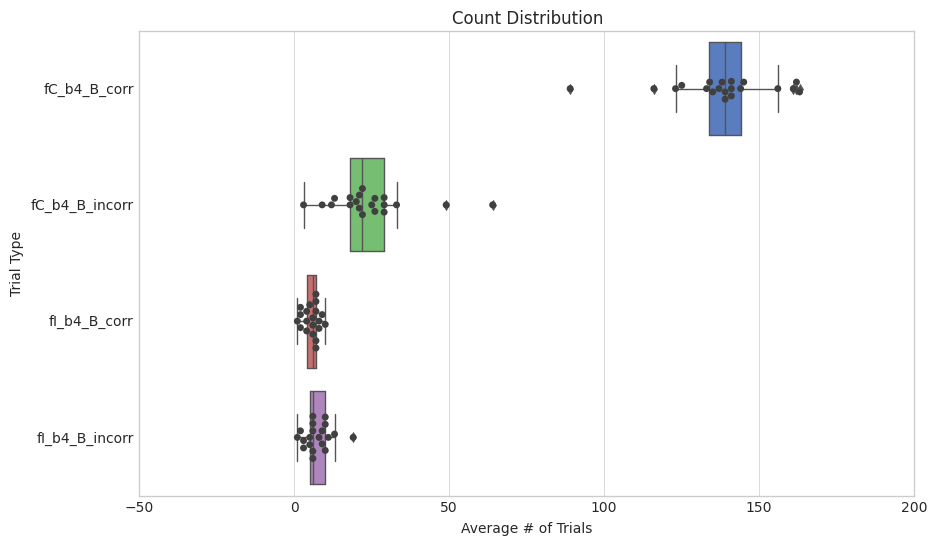

In [9]:
print np.mean(df_2['fC_b4_B_corr'])
print np.mean(df_2['fC_b4_B_incorr'])
print np.mean(df_2['fI_b4_B_corr'])
print np.mean(df_2['fI_b4_B_incorr'])

print np.mean(df_2['fC_b4_B_corr'])/(np.mean(df_2['fC_b4_B_corr'])+np.mean(df_2['fI_b4_B_corr']))
print np.mean(df_2['fC_b4_B_incorr'])/(np.mean(df_2['fC_b4_B_incorr'])+np.mean(df_2['fI_b4_B_incorr']))


N = 4
conditions = ['fC_b4_B_corr', 'fC_b4_B_incorr', 'fI_b4_B_corr', 'fI_b4_B_incorr']

means_allsubjs = [df_2['fC_b4_B_corr'], df_2['fC_b4_B_incorr'],
                  df_2['fI_b4_B_corr'], df_2['fI_b4_B_incorr']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=means_allsubjs, orient = 'h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient = 'h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_xlabel('Average # of Trials')
ax.set_ylabel('Trial Type')
ax.set_title('Count Distribution')
plt.show()

## Far greater number of correct trials for both fixed and conditional trials

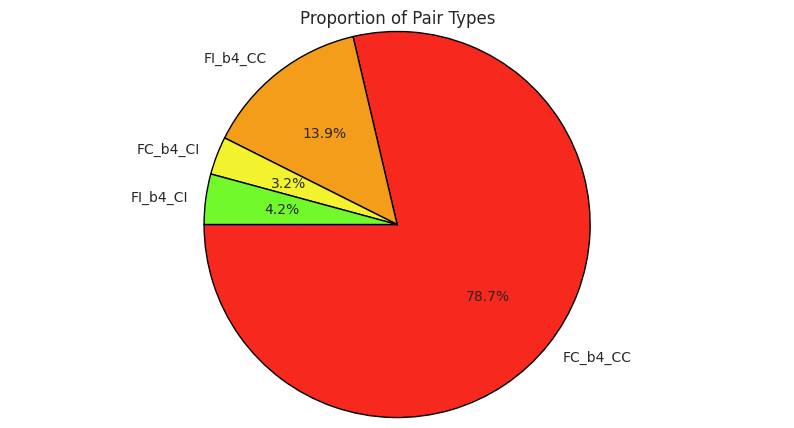

In [10]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie

tot = [np.mean(df_2['fC_b4_B_corr']), np.mean(df_2['fC_b4_B_incorr']), 
       np.mean(df_2['fI_b4_B_corr']), np.mean(df_2['fI_b4_B_incorr'])]
tot = sum(tot)

N = 4
labels = ['FC_b4_CC', 'FI_b4_CC', 'FC_b4_CI', 'FI_b4_CI']
colors = ['#f7281d', '#f49d1a', '#f2f22e', '#71f92c']

means_allsubjs = [np.mean(df_2['fC_b4_B_corr'])/tot, 
                  np.mean(df_2['fC_b4_B_incorr'])/tot,
                  np.mean(df_2['fI_b4_B_corr'])/tot, 
                  np.mean(df_2['fI_b4_B_incorr'])/tot]
fig, ax = plt.subplots(figsize = (10,5))
ax.pie(means_allsubjs, labels = labels, colors = colors, autopct='%1.1f%%', startangle = 180)
ax.axis('equal')
ax.set_title('Proportion of Pair Types')
plt.show()

Proportion of Fixed Correct: 0.929580534489
SD: 0.0252852308872
Proportion of Conditional Correct: 0.761003926661
SD: 0.07818949198

Test for Normacy of Distributions
Fixed Corr Normal Test 1: (2.947172918403826, 0.2291023437784781)
Fixed Corr Normal Test 2: (0.9376626014709473, 0.2165112942457199)
Cond Corr Normal Test 1: (4.8990689731472941, 0.086333766673973883)
Cond Corr Normal Test 2: (0.9396852254867554, 0.2365163415670395)

*Both distributions are normal -- use parametric t-test
Fixed vs Cond Proportion Correct: (10.716301826537102, 1.7074770669281611e-09)


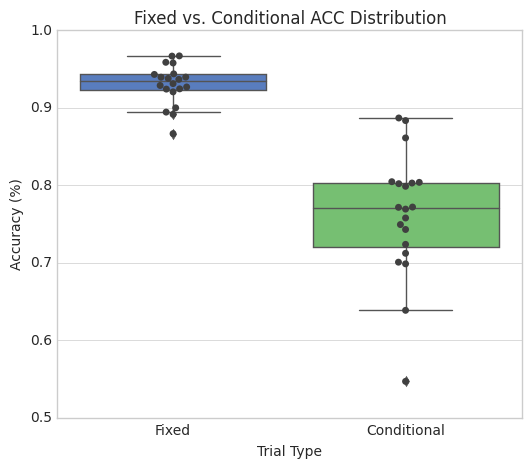

In [11]:
fixed_prop_corr = df_2['f_corr']/(df_2['f_corr'] + df_2['f_incorr'])
cond_prop_corr = df_2['c_corr']/(df_2['c_corr'] + df_2['c_incorr'])
print "Proportion of Fixed Correct:", np.mean(fixed_prop_corr)
print "SD:", np.std(fixed_prop_corr)
print "Proportion of Conditional Correct:", np.mean(cond_prop_corr)
print "SD:", np.std(cond_prop_corr)
print ""
print "Test for Normacy of Distributions"
print "Fixed Corr Normal Test 1:", stats.normaltest(fixed_prop_corr)[:]
print "Fixed Corr Normal Test 2:", stats.shapiro(fixed_prop_corr)
print "Cond Corr Normal Test 1:", stats.normaltest(cond_prop_corr)[:]
print "Cond Corr Normal Test 2:", stats.shapiro(cond_prop_corr)
print ""
print "*Both distributions are normal -- use parametric t-test"
print "Fixed vs Cond Proportion Correct:", stats.ttest_rel(fixed_prop_corr, cond_prop_corr)[:]

N = 2
conditions = ['Fixed', 'Conditional']

means_allsubjs = [df_2['f_corr']/(df_2['f_corr'] + df_2['f_incorr']),
                  df_2['c_corr']/(df_2['c_corr'] + df_2['c_incorr'])] 
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (6,5))
ax = sns.boxplot(data=means_allsubjs)
ax = sns.swarmplot(data=means_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_xlabel("Trial Type")
ax.set_ylabel("Accuracy (%)")
ax.set_title('Fixed vs. Conditional ACC Distribution')
plt.show()

# Significant difference in performance between fixed and conditional trial types
## Performance on fixed trials is better than on conditional trials

Probability of Fixed Predicting Correct Conditional
Fixed Correct: 0.848360379303
SD: 0.0840666595463
Fixed Incorrect: 0.447261673512
SD: 0.184421120326

Test for Normacy of Distributions
Fixed Corr Normal Test 1: (15.178870591947287, 0.00050576658176238148)
Fixed Corr Normal Test 2: (0.8580198884010315, 0.0072849891148507595)
Fixed Incorr Normal Test 1: (0.85506065375564766, 0.65211762500471337)
Fixed Incorr Normal Test 2: (0.9605461359024048, 0.554816722869873)

**Fixed correct is not normal -- Use Non-Parametric Wilcoxon Ranked-Sign Test
1st Fixed Correct vs Incorrect: (0.0, 8.8574576878635474e-05)


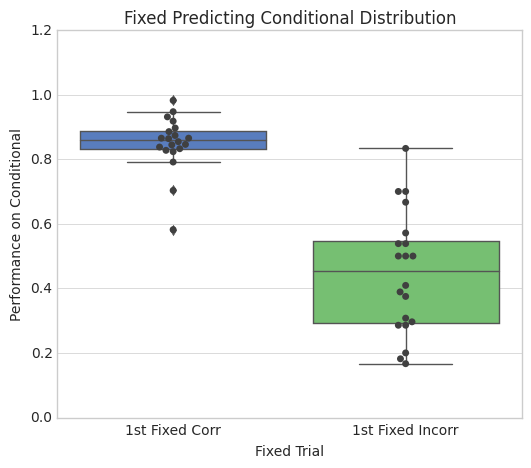

In [12]:
fixed1_corr =  df_2['fC_b4_B_corr']/(df_2['fC_b4_B_corr']+df_2['fC_b4_B_incorr'])
fixed1_incorr = df_2['fI_b4_B_corr']/(df_2['fI_b4_B_corr']+df_2['fI_b4_B_incorr'])
print "Probability of Fixed Predicting Correct Conditional"
print 'Fixed Correct:', np.mean(fixed1_corr)
print "SD:", np.std(fixed1_corr)
print 'Fixed Incorrect:', np.mean(fixed1_incorr)
print "SD:", np.std(fixed1_incorr)
print ""
print "Test for Normacy of Distributions"
print "Fixed Corr Normal Test 1:", stats.normaltest(fixed1_corr)[:]
print "Fixed Corr Normal Test 2:", stats.shapiro(fixed1_corr)
print "Fixed Incorr Normal Test 1:", stats.normaltest(fixed1_incorr)[:]
print "Fixed Incorr Normal Test 2:", stats.shapiro(fixed1_incorr)
print ""
print "**Fixed correct is not normal -- Use Non-Parametric Wilcoxon Ranked-Sign Test"
print "1st Fixed Correct vs Incorrect:", stats.wilcoxon(fixed1_corr, fixed1_incorr)[:]
N = 2
conditions = ['1st Fixed Corr', '1st Fixed Incorr']

allsubjs = [df_2['fC_b4_B_corr']/(df_2['fC_b4_B_corr']+df_2['fC_b4_B_incorr']),
            df_2['fI_b4_B_corr']/(df_2['fI_b4_B_corr']+df_2['fI_b4_B_incorr'])] 

ind = np.arange(N)
fig, ax = plt.subplots(figsize = (6,5))
ax = sns.boxplot(data=allsubjs)
ax = sns.swarmplot(data=allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_xlabel('Fixed Trial')
ax.set_ylabel('Performance on Conditional')
ax.set_title('Fixed Predicting Conditional Distribution')
plt.show()

# Significant difference in performance on the conditional trial between correct and incorrect preceding fixed trial
## Performance on conditional trial is significantly improved following a correct, compare to incorrect, fixed trial

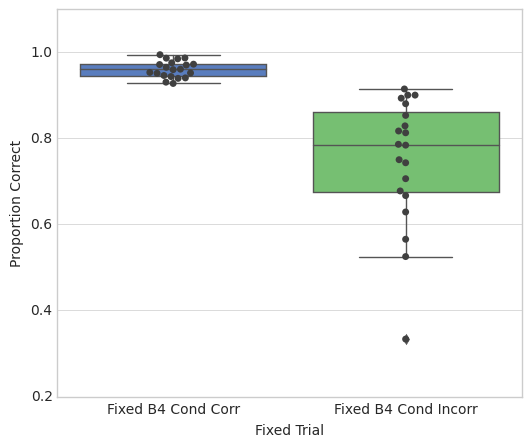

In [13]:
N = 2
conditions = ['Fixed B4 Cond Corr', 'Fixed B4 Cond Incorr']

allsubjs = [df_2['fC_b4_B_corr']/(df_2['fC_b4_B_corr']+df_2['fI_b4_B_corr']),
            df_2['fC_b4_B_incorr']/(df_2['fC_b4_B_incorr']+df_2['fI_b4_B_incorr'])] 

ind = np.arange(N)
fig, ax = plt.subplots(figsize = (6,5))
ax = sns.boxplot(data=allsubjs)
ax = sns.swarmplot(data=allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_xlabel('Fixed Trial')
ax.set_ylabel('Proportion Correct')
#plt.savefig("/home/arenf001/fig000.png", dpi = 1080)
plt.show()

# Significant difference in performance on the conditional trial between correct and incorrect preceding fixed trial
## Performance on conditional trial is significantly improved following a correct, compare to incorrect, fixed trial

## Reaction Time

In [14]:
rt_average ={}
rt_std = {}

for curr_key in rt_table:
    rt_average[curr_key] = np.average(rt_table[curr_key])
    rt_std[curr_key] = np.std(rt_table[curr_key])
RT_average_2 = pd.DataFrame(rt_average, index = (1,))
RT_std_2 = pd.DataFrame(rt_std, index = (1,))

In [15]:
RT_average_2

,c_corr_RTs,c_incorr_RTs,fC_b4_B_corr_RTs,fC_b4_B_incorr_RTs,fI_b4_B_corr_RTs,fI_b4_B_incorr_RTs,f_b4_B_corr_RTs,f_b4_B_incorr_RTs,f_corr_RTs,f_incorr_RTs
1,0.609197,0.655332,0.567639,0.56243,0.617719,0.586382,0.568674,0.567037,0.569634,0.598113


In [16]:
RT_std_2

,c_corr_RTs,c_incorr_RTs,fC_b4_B_corr_RTs,fC_b4_B_incorr_RTs,fI_b4_B_corr_RTs,fI_b4_B_incorr_RTs,f_b4_B_corr_RTs,f_b4_B_incorr_RTs,f_corr_RTs,f_incorr_RTs
1,0.039465,0.0471,0.034244,0.029549,0.084344,0.07329,0.03316,0.029644,0.03227,0.050012


In [17]:
df2_2

,c_corr_RTs,c_incorr_RTs,fC_b4_B_corr_RTs,fC_b4_B_incorr_RTs,fI_b4_B_corr_RTs,fI_b4_B_incorr_RTs,f_b4_B_corr_RTs,f_b4_B_incorr_RTs,f_corr_RTs,f_incorr_RTs
WMAZE_001,0.612143,0.666230,0.545936,0.572923,0.526488,0.572987,0.547730,0.572550,0.549744,0.539586
WMAZE_002,0.568777,0.713987,0.555932,0.541806,0.625066,0.677818,0.558904,0.625072,0.564243,0.590857
WMAZE_003,0.654225,0.706909,0.617614,0.611082,0.654272,0.622334,0.611168,0.610372,0.614501,0.680748
WMAZE_004,0.598331,0.660192,0.549273,0.554001,0.733466,0.777871,0.556123,0.572005,0.561868,0.640627
WMAZE_005,0.623309,0.669855,0.606943,0.613314,0.597154,0.569194,0.608021,0.577168,0.607618,0.656450
WMAZE_006,0.602315,0.642592,0.593655,0.594022,0.516785,0.587873,0.592547,0.597059,0.596876,0.565559
WMAZE_007,0.594632,0.649797,0.531734,0.527999,0.591761,0.528976,0.532695,0.522794,0.523946,0.537770
WMAZE_008,0.536982,0.558380,0.518737,0.518470,0.553434,0.519744,0.519272,0.524031,0.520848,0.513920
WMAZE_009,0.636931,0.695901,0.604599,0.556486,0.658419,0.597303,0.605575,0.578032,0.597295,0.614542
WMAZE_010,0.615212,0.630917,0.591233,0.579240,0.556755,0.597301,0.591255,0.579832,0.583265,0.633971


Fixed Before Cond Corr RT: 0.568674099777
SD: 0.0331604910286
Fixed Before Cond Incorr RT: 0.567037024606
SD: 0.0296438009626
Fixed_b4_corrCond vs Fixed_b4_incorrCond: (0.24574678613411061, 0.80851331651572789)

Test for Normacy of Distributions
Fixed Before Corr Cond Normal Test 1: (1.3300078067375611, 0.51427152031131707)
Fixed Before Corr Cond Normal Test 2: (0.9675675630569458, 0.7029099464416504)
Fixed Before Incorr Cond Normal Test 1: (0.52271593469215372, 0.77000523354480022)
Fixed Before Incorr Cond Normal Test 2: (0.9812438488006592, 0.9491283297538757)

**Normal distributions -- Use Parametric t-Test
Fixed Before Correct vs Incorrect Cond: (0.24574678613411061, 0.80851331651572789)


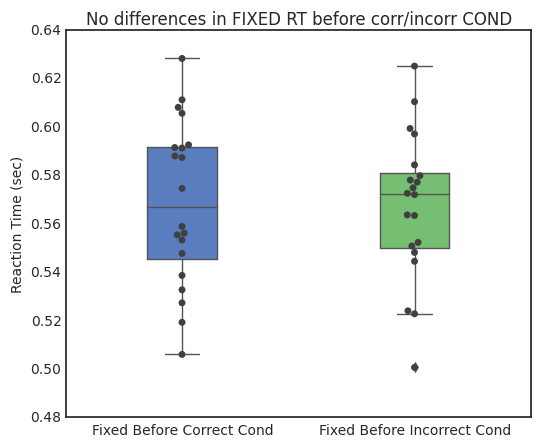

In [24]:
sns.set_style("white")

print 'Fixed Before Cond Corr RT:', np.mean(df2_2['f_b4_B_corr_RTs'])
print "SD:", np.std(df2_2['f_b4_B_corr_RTs'])
print 'Fixed Before Cond Incorr RT:', np.mean(df2_2['f_b4_B_incorr_RTs'])
print "SD:", np.std(df2_2['f_b4_B_incorr_RTs'])
print "Fixed_b4_corrCond vs Fixed_b4_incorrCond:", stats.ttest_rel(df2_2['f_b4_B_corr_RTs'], df2_2['f_b4_B_incorr_RTs'])[:]
print ""
print "Test for Normacy of Distributions"
print "Fixed Before Corr Cond Normal Test 1:", stats.normaltest(df2_2['f_b4_B_corr_RTs'])[:]
print "Fixed Before Corr Cond Normal Test 2:", stats.shapiro(df2_2['f_b4_B_corr_RTs'])
print "Fixed Before Incorr Cond Normal Test 1:", stats.normaltest(df2_2['f_b4_B_incorr_RTs'])[:]
print "Fixed Before Incorr Cond Normal Test 2:", stats.shapiro(df2_2['f_b4_B_incorr_RTs'])
print ""
print "**Normal distributions -- Use Parametric t-Test"
print "Fixed Before Correct vs Incorrect Cond:", stats.ttest_rel(df2_2['f_b4_B_corr_RTs'], df2_2['f_b4_B_incorr_RTs'])[:]

N = 2
conditions = ['Fixed Before Correct Cond', 'Fixed Before Incorrect Cond']

means_allsubjs = [df2_2['f_b4_B_corr_RTs'], df2_2['f_b4_B_incorr_RTs']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (6,5))
ax = sns.boxplot(data=means_allsubjs, width = 0.3)
ax = sns.swarmplot(data=means_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Reaction Time (sec)")
ax.set_title('No differences in FIXED RT before corr/incorr COND')
plt.savefig("/home/arenf001/REVIEWER_fig1.png", dpi = 1080)
plt.show()

Fixed Correct RT: 0.569633739762
SD: 0.0322701648128
Fixed Incorrect RT: 0.598113008249
SD: 0.0500123586
Conditional Correct RT: 0.609196619485
SD: 0.0394652886177
Conditional Incorrect RT: 0.655331756951
SD: 0.0470997225297

Test for Normacy of Distributions
Fixed Corr Normal Test 1: (1.2721846017264216, 0.52935695534978489)
Fixed Corr Normal Test 2: (0.9727696180343628, 0.811954140663147)
Fixed Incorr Normal Test 1: (1.0473080997352819, 0.592352104453715)
Fixed Incorr Normal Test 2: (0.9695407748222351, 0.745145857334137)
Cond Corr Normal Test 1: (1.2536682067260621, 0.53428060347505124)
Cond Corr Normal Test 2: (0.981589138507843, 0.9529252052307129)
Cond Incorr Normal Test 1: (1.2963439438910016, 0.52300096387509432)
Cond Incorr Normal Test 2: (0.9389628171920776, 0.2291799634695053)

*All distributions are normal -- Use Parametric t-Test
Fixed Corr vs Incorr: (-3.340327443812058, 0.0034380912717540801)
Cond Corr vs Incorr: (-5.281753664689071, 4.2535958241130506e-05)


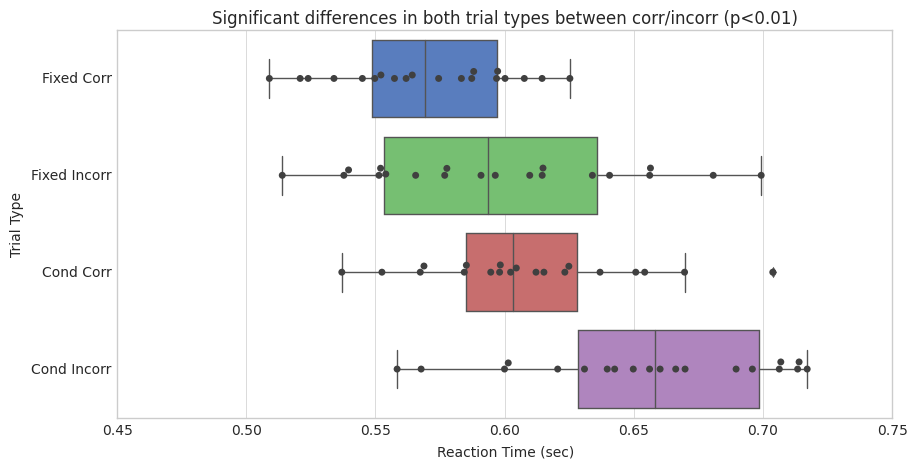

In [19]:
print 'Fixed Correct RT:', np.mean(df2_2['f_corr_RTs'])
print 'SD:', np.std(df2_2['f_corr_RTs'])
print 'Fixed Incorrect RT:', np.mean(df2_2['f_incorr_RTs'])
print 'SD:', np.std(df2_2['f_incorr_RTs'])
print 'Conditional Correct RT:', np.mean(df2_2['c_corr_RTs'])
print 'SD:', np.std(df2_2['c_corr_RTs'])
print 'Conditional Incorrect RT:', np.mean(df2_2['c_incorr_RTs'])
print 'SD:', np.std(df2_2['c_incorr_RTs'])
print ""
print "Test for Normacy of Distributions"
print "Fixed Corr Normal Test 1:", stats.normaltest(df2_2['f_corr_RTs'])[:]
print "Fixed Corr Normal Test 2:", stats.shapiro(df2_2['f_corr_RTs'])
print "Fixed Incorr Normal Test 1:", stats.normaltest(df2_2['f_incorr_RTs'])[:]
print "Fixed Incorr Normal Test 2:", stats.shapiro(df2_2['f_incorr_RTs'])
print "Cond Corr Normal Test 1:", stats.normaltest(df2_2['c_corr_RTs'])[:]
print "Cond Corr Normal Test 2:", stats.shapiro(df2_2['c_corr_RTs'])
print "Cond Incorr Normal Test 1:", stats.normaltest(df2_2['c_incorr_RTs'])[:]
print "Cond Incorr Normal Test 2:", stats.shapiro(df2_2['c_incorr_RTs'])
print ""
print "*All distributions are normal -- Use Parametric t-Test"
print "Fixed Corr vs Incorr:", stats.ttest_rel(df2_2['f_corr_RTs'], df2_2['f_incorr_RTs'])[:]
print "Cond Corr vs Incorr:", stats.ttest_rel(df2_2['c_corr_RTs'], df2_2['c_incorr_RTs'])[:]

N = 4
conditions = ['Fixed Corr', 'Fixed Incorr', 'Cond Corr', 'Cond Incorr']

means_allsubjs = [df2_2['f_corr_RTs'], df2_2['f_incorr_RTs'],
                  df2_2['c_corr_RTs'], df2_2['c_incorr_RTs']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=means_allsubjs, orient='h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel("Trial Type")
ax.set_xlabel("Reaction Time (sec)")
ax.set_title("Significant differences in both trial types between corr/incorr (p<0.01)")
plt.show()

## Third Analysis 
### Counts, Performance, and RT for 
#### fixed before corr/incorr conditional
#### Fixed pairs -- same (AA & CC)
#### Fixed pairs -- change (AC & CA)
#### "Lost" fixed -- fixed followed by BL trial
#### Nonresponse

In [35]:
import os
from os.path import join
import numpy as np
import pandas as pd
from glob import glob
from math import sqrt
%matplotlib inline
import seaborn as sns
sns.set_palette('muted')
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from scipy import stats

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_003', 'WMAZE_004', 'WMAZE_005',
        'WMAZE_006', 'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']
stim_sets = ['set1', 'set2', 'set3']

count_table = {}
rt_table = {}

for sub in subs:
    ct_dict = {}
    rt_dict = {}
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    dir_file = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub)))    
    dir_file.sort() 

    for i, curr_set in enumerate(stim_sets):

        run1 = pd.read_table(dir_file[i * 2])
        run2 = pd.read_table(dir_file[i * 2 + 1])
        
        run1 = run1[:-3]
        run2 = run2[:-3]

        run1_trialtype = run1['TrialType'].values
        run1_correct = run1['Correct'].values 
        run2_trialtype = run2['TrialType'].values
        run2_correct = run2['Correct'].values

        run1_trial_shift = run1_trialtype[:-1] 
        run1_trial_shift = np.insert(run1_trial_shift, 0, -1)
        run2_trial_shift = run2_trialtype[:-1]
        run2_trial_shift = np.insert(run2_trial_shift, 0, -1)

        run1_correct_shift = run1_correct[:-1]
        run1_correct_shift = np.insert(run1_correct_shift, 0, -1)
        run2_correct_shift = run2_correct[:-1]
        run2_correct_shift = np.insert(run2_correct_shift, 0, -1)
                 
        run1_Acorr_Acorr = np.where((run1_trial_shift == 'A') & (run1_correct == 1) 
                                    & (run1_trialtype == 'A') & (run1_correct_shift == 1))
        run1_Acorr_Aincorr = np.where((run1_trial_shift == 'A') & (run1_correct == 1) 
                                      & (run1_trialtype == 'A') & (run1_correct_shift == 0))
        run1_Aincorr_Acorr = np.where((run1_trial_shift == 'A') & (run1_correct == 0) 
                                      & (run1_trialtype == 'A') & (run1_correct_shift == 1))
        run1_Aincorr_Aincorr = np.where((run1_trial_shift == 'A') & (run1_correct == 0) 
                                        & (run1_trialtype == 'A') & (run1_correct_shift == 0))
        run1_Ccorr_Ccorr = np.where((run1_trial_shift == 'C') & (run1_correct == 1) 
                                    & (run1_trialtype == 'C') & (run1_correct_shift == 1))
        run1_Ccorr_Cincorr = np.where((run1_trial_shift == 'C') & (run1_correct == 1) 
                                      & (run1_trialtype == 'C') & (run1_correct_shift == 0))
        run1_Cincorr_Ccorr = np.where((run1_trial_shift == 'C') & (run1_correct == 0) 
                                      & (run1_trialtype == 'C') & (run1_correct_shift == 1))
        run1_Cincorr_Cincorr = np.where((run1_trial_shift == 'C') & (run1_correct == 0) 
                                        & (run1_trialtype == 'C') & (run1_correct_shift == 0))
                
        run1_same_CC = sorted(np.append(run1_Acorr_Acorr, run1_Ccorr_Ccorr))
        run1_same_CI = sorted(np.append(run1_Acorr_Aincorr, run1_Ccorr_Cincorr))
        run1_same_IC = sorted(np.append(run1_Aincorr_Acorr, run1_Cincorr_Ccorr))
        run1_same_II = sorted(np.append(run1_Aincorr_Aincorr, run1_Cincorr_Cincorr))
        
        
        run1_Acorr_Ccorr = np.where((run1_trial_shift == 'A') & (run1_correct == 1) 
                                    & (run1_trialtype == 'C') & (run1_correct_shift == 1))
        run1_Acorr_Cincorr = np.where((run1_trial_shift == 'A') & (run1_correct == 1) 
                                      & (run1_trialtype == 'C') & (run1_correct_shift == 0))
        run1_Aincorr_Ccorr = np.where((run1_trial_shift == 'A') & (run1_correct == 0) 
                                      & (run1_trialtype == 'C') & (run1_correct_shift == 1))
        run1_Aincorr_Cincorr = np.where((run1_trial_shift == 'A') & (run1_correct == 0) 
                                        & (run1_trialtype == 'C') & (run1_correct_shift == 0))
        
        run1_Ccorr_Acorr = np.where((run1_trial_shift == 'C') & (run1_correct == 1) 
                                    & (run1_trialtype == 'A') & (run1_correct_shift == 1))
        run1_Ccorr_Aincorr = np.where((run1_trial_shift == 'C') & (run1_correct == 1) 
                                      & (run1_trialtype == 'A') & (run1_correct_shift == 0))
        run1_Cincorr_Acorr = np.where((run1_trial_shift == 'C') & (run1_correct == 0) 
                                      & (run1_trialtype == 'A') & (run1_correct_shift == 1))
        run1_Cincorr_Aincorr = np.where((run1_trial_shift == 'C') & (run1_correct == 0) 
                                        & (run1_trialtype == 'A') & (run1_correct_shift == 0))
                
        run1_change_CC = sorted(np.append(run1_Acorr_Ccorr, run1_Ccorr_Acorr))
        run1_change_CI = sorted(np.append(run1_Acorr_Cincorr, run1_Ccorr_Aincorr))
        run1_change_IC = sorted(np.append(run1_Aincorr_Ccorr, run1_Cincorr_Acorr))
        run1_change_II = sorted(np.append(run1_Aincorr_Cincorr, run1_Cincorr_Aincorr))
        run1_f_b4_c_corr = list(np.where(((run1_trial_shift != 'BL') & (run1_correct == 1)) 
                                         & (run1_trialtype == 'B'))[0])  
        run1_f_b4_c_incorr = list(np.where(((run1_trial_shift != 'BL') & (run1_correct == 0)) 
                                           & (run1_trialtype == 'B'))[0])
        
        run2_Acorr_Acorr = np.where((run2_trial_shift == 'A') & (run2_correct == 1) 
                                    & (run2_trialtype == 'A') & (run2_correct_shift == 1))
        run2_Acorr_Aincorr = np.where((run2_trial_shift == 'A') & (run2_correct == 1) 
                                      & (run2_trialtype == 'A') & (run2_correct_shift == 0))
        run2_Aincorr_Acorr = np.where((run2_trial_shift == 'A') & (run2_correct == 0) 
                                      & (run2_trialtype == 'A') & (run2_correct_shift == 1))
        run2_Aincorr_Aincorr = np.where((run2_trial_shift == 'A') & (run2_correct == 0) 
                                        & (run2_trialtype == 'A') & (run2_correct_shift == 0))
        run2_Ccorr_Ccorr = np.where((run2_trial_shift == 'C') & (run2_correct == 1) 
                                    & (run2_trialtype == 'C') & (run2_correct_shift == 1))
        run2_Ccorr_Cincorr = np.where((run2_trial_shift == 'C') & (run2_correct == 1) 
                                      & (run2_trialtype == 'C') & (run2_correct_shift == 0))
        run2_Cincorr_Ccorr = np.where((run2_trial_shift == 'C') & (run2_correct == 0) 
                                      & (run2_trialtype == 'C') & (run2_correct_shift == 1))
        run2_Cincorr_Cincorr = np.where((run2_trial_shift == 'C') & (run2_correct == 0) 
                                        & (run2_trialtype == 'C') & (run2_correct_shift == 0))               

        run2_same_CC = sorted(np.append(run2_Acorr_Acorr, run2_Ccorr_Ccorr))
        run2_same_CI = sorted(np.append(run2_Acorr_Aincorr, run2_Ccorr_Cincorr))
        run2_same_IC = sorted(np.append(run2_Aincorr_Acorr, run2_Cincorr_Ccorr))
        run2_same_II = sorted(np.append(run2_Aincorr_Aincorr, run2_Cincorr_Cincorr))       

        run2_Acorr_Ccorr = np.where((run2_trial_shift == 'A') & (run2_correct == 1) 
                                    & (run2_trialtype == 'C') & (run2_correct_shift == 1))
        run2_Acorr_Cincorr = np.where((run2_trial_shift == 'A') & (run2_correct == 1) 
                                      & (run2_trialtype == 'C') & (run2_correct_shift == 0))
        run2_Aincorr_Ccorr = np.where((run2_trial_shift == 'A') & (run2_correct == 0) 
                                      & (run2_trialtype == 'C') & (run2_correct_shift == 1))
        run2_Aincorr_Cincorr = np.where((run2_trial_shift == 'A') & (run2_correct == 0) 
                                        & (run2_trialtype == 'C') & (run2_correct_shift == 0))        

        run2_Ccorr_Acorr = np.where((run2_trial_shift == 'C') & (run2_correct == 1) 
                                    & (run2_trialtype == 'A') & (run2_correct_shift == 1))
        run2_Ccorr_Aincorr = np.where((run2_trial_shift == 'C') & (run2_correct == 1) 
                                      & (run2_trialtype == 'A') & (run2_correct_shift == 0))
        run2_Cincorr_Acorr = np.where((run2_trial_shift == 'C') & (run2_correct == 0) 
                                      & (run2_trialtype == 'A') & (run2_correct_shift == 1))
        run2_Cincorr_Aincorr = np.where((run2_trial_shift == 'C') & (run2_correct == 0) 
                                        & (run2_trialtype == 'A') & (run2_correct_shift == 0))                

        run2_change_CC = sorted(np.append(run2_Acorr_Ccorr, run2_Ccorr_Acorr))
        run2_change_CI = sorted(np.append(run2_Acorr_Cincorr, run2_Ccorr_Aincorr))
        run2_change_IC = sorted(np.append(run2_Aincorr_Ccorr, run2_Cincorr_Acorr))
        run2_change_II = sorted(np.append(run2_Aincorr_Cincorr, run2_Cincorr_Aincorr))
        run2_f_b4_c_corr = list(np.where(((run2_trial_shift != 'BL') & (run2_correct == 1)) 
                                         & (run2_trialtype == 'B'))[0])        
        run2_f_b4_c_incorr = list(np.where(((run2_trial_shift != 'BL') & (run2_correct == 0)) 
                                           & (run2_trialtype == 'B'))[0])
               
        run_types = {'run1_same_CC': run1_same_CC, 'run1_same_CI': run1_same_CI,
                     'run1_same_IC': run1_same_IC, 'run1_same_II': run1_same_II,
                     'run1_change_CC': run1_change_CC, 'run1_change_CI': run1_change_CI,
                     'run1_change_IC': run1_change_IC, 'run1_change_II': run1_change_II,
                     'run2_same_CC': run2_same_CC, 'run2_same_CI': run2_same_CI,
                     'run2_same_IC': run2_same_IC, 'run2_same_II': run2_same_II,
                     'run2_change_CC': run2_change_CC, 'run2_change_CI': run2_change_CI,
                     'run2_change_IC': run2_change_IC, 'run2_change_II': run2_change_II} 
        
        for key in run_types:
            if len(run_types[key]) > 0:
                if run_types[key][-1] == 156:
                    run_types[key] = run_types[key][:-1] 
        run1_RTs = run1['RT']
        run2_RTs = run2['RT']    
         
        run1_same_CC_RTs = run1_RTs.values[(run_types['run1_same_CC'],)]
        run1_same_CI_RTs = run1_RTs.values[(run_types['run1_same_CI'],)] 
        run1_same_IC_RTs = run1_RTs.values[(run_types['run1_same_IC'],)]
        run1_same_II_RTs = run1_RTs.values[(run_types['run1_same_II'],)]
        run1_change_CC_RTs = run1_RTs.values[(run_types['run1_change_CC'],)]
        run1_change_CI_RTs = run1_RTs.values[(run_types['run1_change_CI'],)] 
        run1_change_IC_RTs = run1_RTs.values[(run_types['run1_change_IC'],)]
        run1_change_II_RTs = run1_RTs.values[(run_types['run1_change_II'],)]
        run1_f_b4_c_corr_RTs = run1_RTs.values[run1_f_b4_c_corr]
        run1_f_b4_c_incorr_RTs = run1_RTs.values[run1_f_b4_c_incorr]

        run2_same_CC_RTs = run2_RTs.values[(run_types['run2_same_CC'],)]
        run2_same_CI_RTs = run2_RTs.values[(run_types['run2_same_CI'],)] 
        run2_same_IC_RTs = run2_RTs.values[(run_types['run2_same_IC'],)]
        run2_same_II_RTs = run2_RTs.values[(run_types['run2_same_II'],)]

        run2_change_CC_RTs = run2_RTs.values[(run_types['run2_change_CC'],)]
        run2_change_CI_RTs = run2_RTs.values[(run_types['run2_change_CI'],)] 
        run2_change_IC_RTs = run2_RTs.values[(run_types['run2_change_IC'],)]
        run2_change_II_RTs = run2_RTs.values[(run_types['run2_change_II'],)]
        run2_f_b4_c_corr_RTs = run2_RTs.values[run2_f_b4_c_corr]
        run2_f_b4_c_incorr_RTs = run2_RTs.values[run2_f_b4_c_incorr]
             
        for curr_type in ['same', 'change']:
            for acc in ['CC', 'CI', 'IC', 'II']:
                curr_name = '{0}_{1}'.format(curr_type, acc)
                rt_name = '{0}_{1}_RTs'.format(curr_type, acc)
                if not curr_name in ct_dict:
                    ct_dict[curr_name] = []
                ct_dict[curr_name].append(len(eval('run1_' + curr_name)))
                ct_dict[curr_name].append(len(eval('run2_' + curr_name)))
                if not rt_name in rt_dict:
                    rt_dict[rt_name] = []
                rt_eval = eval('run1_' + rt_name)
                rt_notNaN = np.where(rt_eval >= 0)
                rt_notNaN = rt_eval[rt_notNaN[0]]           
                if rt_notNaN.shape[0] == 0:
                    rt_dict[rt_name].append(None)                       
                else:
                    rt_dict[rt_name].append(np.average(rt_notNaN))
                rt_eval = eval('run2_' + rt_name)
                rt_notNaN = np.where(rt_eval >= 0)
                rt_notNaN = rt_eval[rt_notNaN[0]]           
                if rt_notNaN.shape[0] == 0:
                    rt_dict[rt_name].append(None)                       
                else:
                    rt_dict[rt_name].append(np.average(rt_notNaN))                   
    
    for key in ct_dict:
        ct_dict[key] = np.sum(ct_dict[key])
        if not key in count_table:
            count_table[key] = []
        count_table[key].append(ct_dict[key])
                
    for key in rt_dict:
        rt_notNONE = np.where(np.array(rt_dict[key]) >= 0)
        rt_dict[key] = np.average(np.array(rt_dict[key])[rt_notNONE[0]])
        if not key in rt_table:
            rt_table[key] = []
        rt_table[key].append(rt_dict[key])
        
df_3 = pd.DataFrame(count_table, index = subs) 
df2_3 = pd.DataFrame(rt_table, index = subs) 

In [36]:
ct_avg = {}
ct_std = {}

for curr_key in count_table:
    ct_avg[curr_key] = np.average(count_table[curr_key])
    ct_std[curr_key] = np.std(count_table[curr_key])
    
count_average_3 = pd.DataFrame(ct_avg, index = (1,))
count_std_3 = pd.DataFrame(ct_std, index = (1,))

In [37]:
count_average_3

,change_CC,change_CI,change_IC,change_II,same_CC,same_CI,same_IC,same_II
1,122.6,7.8,2.6,1.55,29.45,1.8,1.95,0.15


In [38]:
count_std_3

,change_CC,change_CI,change_IC,change_II,same_CC,same_CI,same_IC,same_II
1,7.465923,4.118252,2.6533,1.465435,5.324237,1.568439,1.909843,0.357071


In [39]:
df_3

,change_CC,change_CI,change_IC,change_II,same_CC,same_CI,same_IC,same_II
WMAZE_001,122,6,3,1,40,0,0,0
WMAZE_002,129,2,0,3,24,1,1,0
WMAZE_003,117,5,5,2,26,4,0,0
WMAZE_004,122,10,2,2,31,3,0,0
WMAZE_005,124,8,10,1,28,1,1,0
WMAZE_006,113,6,1,1,39,0,1,1
WMAZE_007,124,12,3,0,25,4,6,0
WMAZE_008,110,14,7,2,31,2,2,1
WMAZE_009,127,16,1,0,29,1,5,0
WMAZE_010,135,3,6,4,24,3,0,0


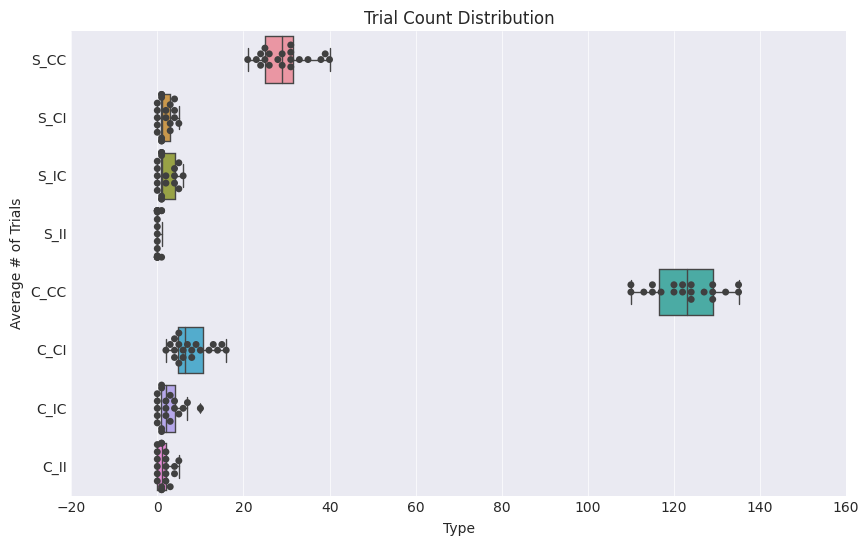

In [40]:
N = 8
conditions = ['S_CC', 'S_CI', 'S_IC', 'S_II', 'C_CC', 'C_CI', 'C_IC', 'C_II']

means_allsubjs = [df_3['same_CC'], df_3['same_CI'],
                  df_3['same_IC'], df_3['same_II'],
                  df_3['change_CC'], df_3['change_CI'],
                  df_3['change_IC'], df_3['change_II']]  
ind = np.arange(N)
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=means_allsubjs, orient = 'h')
ax = sns.swarmplot(data=means_allsubjs, color='.25', orient = 'h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_ylabel('Average # of Trials')
ax.set_xlabel('Type')
ax.set_title('Trial Count Distribution')
plt.show()

Frst Same Corr Prop: 0.939099977069
SD: 0.0549415937389
Frst Same Incorr Prop: 0.931111111111
SD: 0.148307321897

Test for Normacy of Distributions
Frst Same Corr Normal Test 1: (2.2716606146627516, 0.32115535295577735)
Frst Same Corr Normal Test 2: (0.8972636461257935, 0.03665505349636078)
Frst Same Incorr Normal Test 1: (nan, nan)
Frst Same Incorr Normal Test 2: (nan, 1.0)

**Incorrect distribution is non-normal -- Use Non-Parametric Wilcoxon Ranked-Sign Test
Frst Same Corr vs Incorr: (24.0, 0.012946026127481566)


/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/scipy/stats/morestats.py:2386: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/home/data/madlab/envs/wmaze_madlab_env/lib/python2.7/site-packages/scipy/stats/morestats.py:2387: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


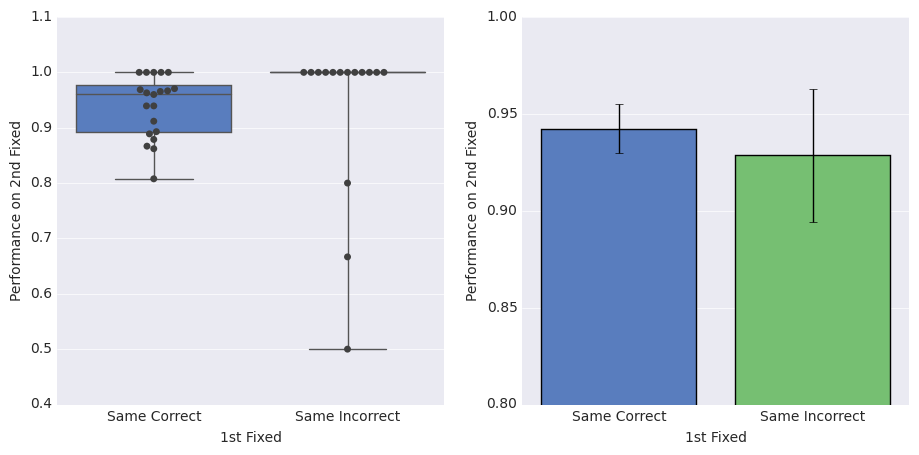

In [41]:
frst_corr_prop = df_3['same_CC']/(df_3['same_CC']+df_3['same_CI'])
frst_incorr_prop = df_3['same_IC']/(df_3['same_IC']+df_3['same_II'])
#remove NaNs
#frst_incorr_prop2 = [frst_incorr_prop2 for frst_incorr_prop2 in frst_incorr_prop2 if str(frst_incorr_prop2) != 'nan']
print "Frst Same Corr Prop:", np.mean(frst_corr_prop)
print "SD:", np.std(frst_corr_prop)
print "Frst Same Incorr Prop:", np.mean(frst_incorr_prop)
print "SD:", np.std(frst_incorr_prop)
print ""
print "Test for Normacy of Distributions"
print "Frst Same Corr Normal Test 1:", stats.normaltest(frst_corr_prop)[:]
print "Frst Same Corr Normal Test 2:", stats.shapiro(frst_corr_prop)
print "Frst Same Incorr Normal Test 1:", stats.normaltest(frst_incorr_prop)[:]
print "Frst Same Incorr Normal Test 2:", stats.shapiro(frst_incorr_prop)
print ""
print "**Incorrect distribution is non-normal -- Use Non-Parametric Wilcoxon Ranked-Sign Test"
print "Frst Same Corr vs Incorr:", stats.wilcoxon(frst_corr_prop, frst_incorr_prop)[:]

N = 2
conditions = ['Same Correct', 'Same Incorrect']
ind = np.arange(N)

allsubjs = [frst_corr_prop, frst_incorr_prop] 

means_allsubjs = [df_3['same_CC'].mean()/(df_3['same_CC'].mean()+df_3['same_CI'].mean()),
                  df_3['same_IC'].mean()/(df_3['same_IC'].mean()+df_3['same_II'].mean())]  
sem_allsubjs= [(df_3['same_CC']/(df_3['same_CC']+df_3['same_CI'])).std()/(np.sqrt(len(subs))),
               (df_3['same_IC']/(df_3['same_IC']+df_3['same_II'])).std()/(np.sqrt(len(subs)))]

fig, ax = plt.subplots(ncols = 2, figsize=(11, 5), sharex = True, sharey = False) 
sns.boxplot(data=allsubjs, ax=ax[0])
sns.swarmplot(data=allsubjs, color='.25', ax=ax[0])

ax[0].set_xticks(ind)
ax[0].set_xticklabels(conditions)
ax[0].set_xlabel('1st Fixed')
ax[0].set_ylabel('Performance on 2nd Fixed')

sns.barplot(ind, means_allsubjs, yerr = sem_allsubjs, ecolor = 'black', ax=ax[1])
ax[1].set_xticks(ind)
ax[1].set_xticklabels(conditions)
ax[1].set_xlabel('1st Fixed')
ax[1].set_ylim(0.8, 1.0)
ax[1].set_ylabel('Performance on 2nd Fixed')

plt.show()

# Box/swarm plots will not represent this data well as 5 subjects have NaN (zero trials for all types)
## Not enough SAME trials to provide a normal distribution

Frst Change Corr: 0.940277312354
Frst Change Incorr: 0.590404040404

Test for Normacy of Distributions
Frst Change Corr Normal Test 1: (2.3377744032897727, 0.31071250932533084)
Frst Change Corr Normal Test 2: (0.9159844517707825, 0.08295246213674545)
Frst Change Incorr Normal Test 1: (nan, nan)
Frst Change Incorr Normal Test 2: (nan, 1.0)

**Incorrect distribution is non-normal -- Use Non-Parametric Wilcoxon Ranked-Sign Test
Frst Change Corr vs Incorr: (12.0, 0.00051671512385675217)


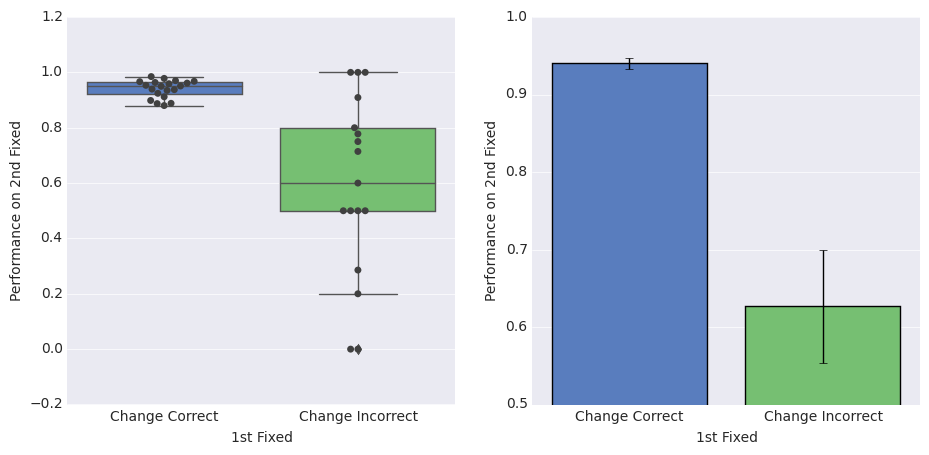

In [42]:
frst_corr_prop2 =  df_3['change_CC']/(df_3['change_CC']+df_3['change_CI'])
frst_incorr_prop2 = df_3['change_IC']/(df_3['change_IC']+df_3['change_II'])
print "Frst Change Corr:", np.mean(frst_corr_prop2)
print "Frst Change Incorr:", np.mean(frst_incorr_prop2)
print ""
print "Test for Normacy of Distributions"
print "Frst Change Corr Normal Test 1:", stats.normaltest(frst_corr_prop2)[:]
print "Frst Change Corr Normal Test 2:", stats.shapiro(frst_corr_prop2)
print "Frst Change Incorr Normal Test 1:", stats.normaltest(frst_incorr_prop2)[:]
print "Frst Change Incorr Normal Test 2:", stats.shapiro(frst_incorr_prop2)
print ""
print "**Incorrect distribution is non-normal -- Use Non-Parametric Wilcoxon Ranked-Sign Test"
print "Frst Change Corr vs Incorr:", stats.wilcoxon(frst_corr_prop2, frst_incorr_prop2)[:]

N = 2
conditions = ['Change Correct', 'Change Incorrect']
ind = np.arange(N)

allsubjs = [frst_corr_prop2, frst_incorr_prop2]
means_allsubjs = [df_3['change_CC'].mean()/(df_3['change_CC'].mean()+df_3['change_CI'].mean()),
                  df_3['change_IC'].mean()/(df_3['change_IC'].mean()+df_3['change_II'].mean())]  
sem_allsubjs= [(df_3['change_CC']/(df_3['change_CC']+df_3['change_CI'])).std()/(np.sqrt(len(subs))),
               (df_3['change_IC']/(df_3['change_IC']+df_3['change_II'])).std()/(np.sqrt(len(subs)))]
                    

fig, ax = plt.subplots(ncols = 2, figsize=(11, 5), sharex = True, sharey = False) 
sns.boxplot(data=allsubjs, ax=ax[0])
sns.swarmplot(data=allsubjs, color='.25', ax=ax[0])

ax[0].set_xticks(ind)
ax[0].set_xticklabels(conditions)
ax[0].set_xlabel('1st Fixed')
ax[0].set_ylabel('Performance on 2nd Fixed')

sns.barplot(ind, means_allsubjs, yerr = sem_allsubjs, ecolor = 'black', ax=ax[1])
ax[1].set_xticks(ind)
ax[1].set_xticklabels(conditions)
ax[1].set_xlabel('1st Fixed')
ax[1].set_ylim(0.5, 1.0)
ax[1].set_ylabel('Performance on 2nd Fixed')

plt.show()

In [43]:
rt_average_3 ={}
rt_std_3 = {}

for curr_key in rt_table:
    rt_average_3[curr_key] = np.average(rt_table[curr_key])
    rt_std_3[curr_key] = np.std(rt_table[curr_key])
    
RT_average_3 = pd.DataFrame(rt_average_3, index = (1,))
RT_std_3 = pd.DataFrame(rt_std_3, index = (1,))

In [44]:
RT_average_3

,change_CC_RTs,change_CI_RTs,change_IC_RTs,change_II_RTs,same_CC_RTs,same_CI_RTs,same_IC_RTs,same_II_RTs
1,0.53925,0.571515,0.717036,0.761532,0.57183,0.72746,0.683758,0.946681


In [45]:
RT_std_3

,change_CC_RTs,change_CI_RTs,change_IC_RTs,change_II_RTs,same_CC_RTs,same_CI_RTs,same_IC_RTs,same_II_RTs
1,0.032574,0.055886,0.197762,0.197061,0.038916,0.192605,0.226179,0.142819


In [46]:
df2_3

,change_CC_RTs,change_CI_RTs,change_IC_RTs,change_II_RTs,same_CC_RTs,same_CI_RTs,same_IC_RTs,same_II_RTs
WMAZE_001,0.530207,0.545941,0.433414,0.450134,0.514873,True,True,True
WMAZE_002,0.525224,0.541775,True,0.883412,0.526605,0.466787,0.766709,True
WMAZE_003,0.612002,0.640093,0.733446,0.708403,0.583124,0.686204,True,True
WMAZE_004,0.510060,0.483443,0.583443,0.708425,0.586564,0.483426,True,True
WMAZE_005,0.571495,0.646960,0.738081,0.683421,0.635152,0.650069,0.666749,True
WMAZE_006,0.556630,0.563971,0.916745,0.650094,0.612722,True,0.566758,0.533475
WMAZE_007,0.509019,0.527332,0.541806,True,0.501803,0.633454,0.472309,True
WMAZE_008,0.494243,0.506742,0.602898,0.500099,0.543110,0.49176,0.291767,0.516708
WMAZE_009,0.527652,0.643385,0.600051,True,0.593432,0.716733,0.529272,True
WMAZE_010,0.567703,0.533415,0.677873,0.594545,0.558370,0.570955,True,True


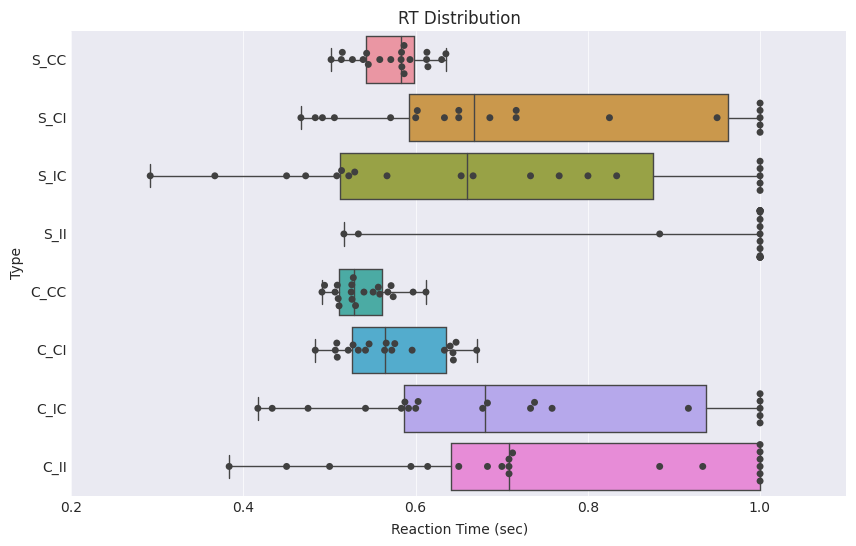

In [47]:
N = 8
conditions = ['S_CC', 'S_CI', 'S_IC', 'S_II', 'C_CC', 'C_CI', 'C_IC', 'C_II']

RTs_allsubjs = [df2_3['same_CC_RTs'],
                df2_3['same_CI_RTs'],
                df2_3['same_IC_RTs'],
                df2_3['same_II_RTs'],
                df2_3['change_CC_RTs'],
                df2_3['change_CI_RTs'],
                df2_3['change_IC_RTs'],
                df2_3['change_II_RTs']] 
ind = np.arange(N)
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=RTs_allsubjs, orient = 'h')
ax = sns.swarmplot(data=RTs_allsubjs, color='.25', orient = 'h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_xlabel('Reaction Time (sec)')
ax.set_ylabel('Type')
ax.set_title('RT Distribution')
plt.show()

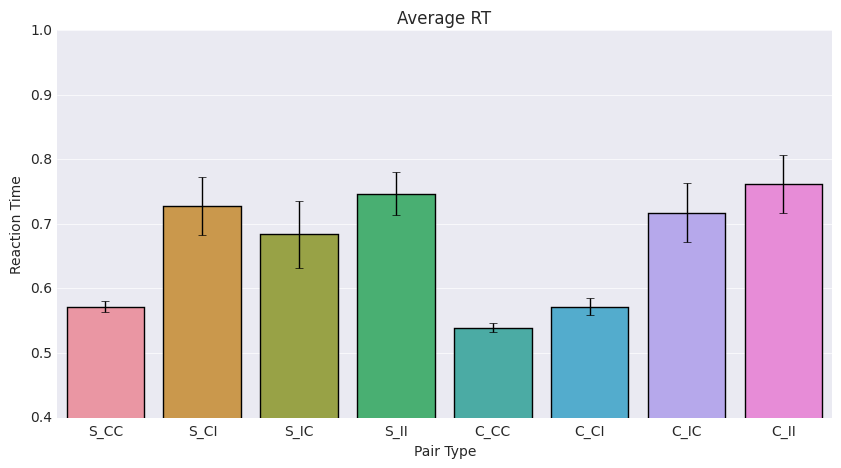

In [48]:
N = 8
conditions = ['S_CC', 'S_CI', 'S_IC', 'S_II', 'C_CC', 'C_CI', 'C_IC', 'C_II']
means_allsubjs = [df2_3['same_CC_RTs'].mean(), df2_3['same_CI_RTs'].mean(),
                  df2_3['same_IC_RTs'].mean(), df2_3['same_II_RTs'].mean(),
                  df2_3['change_CC_RTs'].mean(), df2_3['change_CI_RTs'].mean(),
                  df2_3['change_IC_RTs'].mean(), df2_3['change_II_RTs'].mean()]  
sem_allsubjs = [df2_3['same_CC_RTs'].std()/(np.sqrt(len(subs))),
                df2_3['same_CI_RTs'].std()/(np.sqrt(len(subs))),
                df2_3['same_IC_RTs'].std()/(np.sqrt(len(subs))),
                df2_3['same_II_RTs'].std()/(np.sqrt(len(subs))),
                df2_3['change_CC_RTs'].std()/(np.sqrt(len(subs))),
                df2_3['change_CI_RTs'].std()/(np.sqrt(len(subs))),
                df2_3['change_IC_RTs'].std()/(np.sqrt(len(subs))),
                df2_3['change_II_RTs'].std()/(np.sqrt(len(subs)))]
ind = np.arange(N)
width = 0.5
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.barplot(ind, means_allsubjs, yerr = sem_allsubjs, ecolor = 'black')
ax.set_ylim(0.4,1)
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_xlabel("Pair Type")
ax.set_ylabel("Reaction Time")
ax.set_title("Average RT")
plt.show()

Same RT: 0.732432229915
SD: 0.0886546406155
Change RT: 0.647333666839
SD: 0.0886546406155
Same vs Change RT: (3.3423260569471256, 0.0034226196019702276)

Same 1st Corr RT: 0.64964491725
SD: 0.0959017264753
Change 1st Corr RT: 0.555382972295
SD: 0.0959017264753
Same vs Change 1st Correct RT: (4.3265511616608672, 0.00036370347342957863)


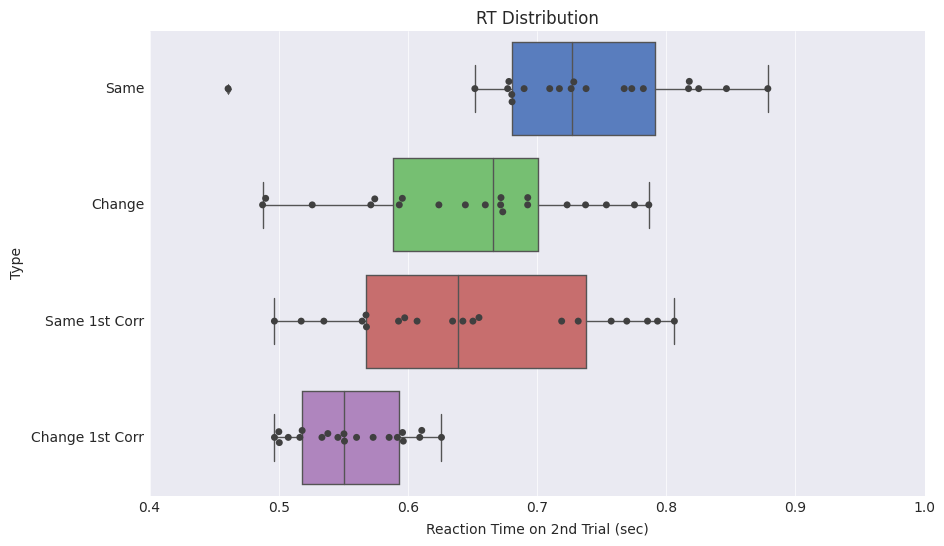

In [49]:
same_all_RT = df2_3[['same_CC_RTs', 'same_CI_RTs', 'same_IC_RTs', 'same_II_RTs']].mean(axis=1)
same_frst_corr_RT = df2_3[['same_CC_RTs', 'same_CI_RTs']].mean(axis=1)
change_all_RT = df2_3[['change_CC_RTs', 'change_CI_RTs', 'change_IC_RTs', 'change_II_RTs']].mean(axis=1)
change_frst_corr_RT = df2_3[['change_CC_RTs', 'change_CI_RTs']].mean(axis=1)
print "Same RT:", np.mean(same_all_RT)
print "SD:", np.std(same_all_RT)
print "Change RT:", np.mean(change_all_RT) 
print "SD:", np.std(same_all_RT)
print "Same vs Change RT:", stats.ttest_rel(same_all_RT, change_all_RT)[:]
print ""
print "Same 1st Corr RT:", np.mean(same_frst_corr_RT)
print "SD:", np.std(same_frst_corr_RT)
print "Change 1st Corr RT:", np.mean(change_frst_corr_RT) 
print "SD:", np.std(same_frst_corr_RT)
print "Same vs Change 1st Correct RT:", stats.ttest_rel(same_frst_corr_RT, change_frst_corr_RT)[:]
    
N = 4
conditions = ['Same', 'Change', 'Same 1st Corr', 'Change 1st Corr']

RTs_allsubjs = [same_all_RT, change_all_RT, same_frst_corr_RT, change_frst_corr_RT] 
ind = np.arange(N)
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.boxplot(data=RTs_allsubjs, orient = 'h')
ax = sns.swarmplot(data=RTs_allsubjs, color='.25', orient = 'h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_xlabel('Reaction Time on 2nd Trial (sec)')
ax.set_ylabel('Type')
ax.set_title('RT Distribution')
plt.show()

# Proportions of Trial Pairs

In [80]:
import os
from os.path import join
import numpy as np
import pandas as pd
from glob import glob
from math import sqrt
%matplotlib inline
import seaborn as sns
sns.set_palette('muted')
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from scipy import stats

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_003', 'WMAZE_004', 'WMAZE_005',
        'WMAZE_006', 'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

#subs = ['WMAZE_001']
stim_sets = ['set1', 'set2', 'set3']

count_table = {}
rt_table = {}

for sub in subs:
    ct_dict = {}
    rt_dict = {}
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    dir_file = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub)))    
    dir_file.sort() 

    for i, curr_set in enumerate(stim_sets):

        run1 = pd.read_table(dir_file[i * 2])
        run2 = pd.read_table(dir_file[i * 2 + 1])
        
        run1 = run1[:-3]
        run2 = run2[:-3]

        run1_trialtype = run1['TrialType'].values
        run1_correct = run1['Correct'].values 
        run2_trialtype = run2['TrialType'].values
        run2_correct = run2['Correct'].values

        run1_trial_shift = run1_trialtype[1:] 
        run1_trial_shift = np.append(run1_trial_shift, -1)
        run2_trial_shift = run2_trialtype[1:]
        run2_trial_shift = np.append(run2_trial_shift, -1)

                 
        run1_FF = np.where(((run1_trialtype == 'A') | (run1_trialtype == 'C'))
                            & ((run1_trial_shift == 'A') | (run1_trial_shift == 'C')))[0]
        run1_FC = np.where(((run1_trialtype == 'A') | (run1_trialtype == 'C')) & (run1_trial_shift == 'B'))[0]
        run1_FBL = np.where(((run1_trialtype == 'A') | (run1_trialtype == 'C')) & (run1_trial_shift == 'BL'))[0]
        
        run2_FF = np.where(((run2_trialtype == 'A') | (run2_trialtype == 'C'))
                            & ((run2_trial_shift == 'A') | (run2_trial_shift == 'C')))[0]
        run2_FC = np.where(((run2_trialtype == 'A') | (run2_trialtype == 'C')) & (run2_trial_shift == 'B'))[0]
        run2_FBL = np.where(((run2_trialtype == 'A') | (run2_trialtype == 'C')) & (run2_trial_shift == 'BL'))[0]
        
                 
        for curr_type in ['FF', 'FC', 'FBL']:
            curr_name = '{0}'.format(curr_type)
            if not curr_name in ct_dict:
                ct_dict[curr_name] = []
            ct_dict[curr_name].append(len(eval('run1_' + curr_name)))
            ct_dict[curr_name].append(len(eval('run2_' + curr_name)))
                    
    for key in ct_dict:
        ct_dict[key] = np.sum(ct_dict[key])
        if not key in count_table:
            count_table[key] = []
        count_table[key].append(ct_dict[key])
        
df_4 = pd.DataFrame(count_table, index = subs) 

In [81]:
df_4

,FBL,FC,FF
WMAZE_001,124,168,173
WMAZE_002,121,183,165
WMAZE_003,123,178,167
WMAZE_004,120,174,174
WMAZE_005,108,183,176
WMAZE_006,126,177,164
WMAZE_007,123,171,175
WMAZE_008,124,174,169
WMAZE_009,113,174,181
WMAZE_010,118,166,181


In [82]:
ct_avg = {}
ct_std = {}

for curr_key in count_table:
    ct_avg[curr_key] = np.average(count_table[curr_key])
    ct_std[curr_key] = np.std(count_table[curr_key])
    
count_average_4 = pd.DataFrame(ct_avg, index = (1,))
count_std_4 = pd.DataFrame(ct_std, index = (1,))

In [83]:
count_average_4

,FBL,FC,FF
1,119.35,176.0,171.25


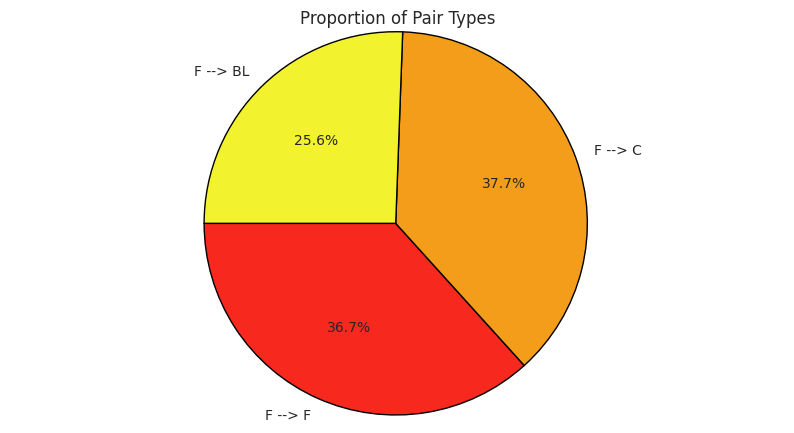

In [86]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie

tot = [np.mean(df_4['FF']), np.mean(df_4['FC']), np.mean(df_4['FBL'])]
tot = sum(tot)

N = 3
labels = ['F --> F', 'F --> C', 'F --> BL']
colors = ['#f7281d', '#f49d1a', '#f2f22e']

means_allsubjs = [np.mean(df_4['FF'])/tot, 
                  np.mean(df_4['FC'])/tot,
                  np.mean(df_4['FBL'])/tot]
fig, ax = plt.subplots(figsize = (10,5))
ax.pie(means_allsubjs, labels = labels, colors = colors, autopct='%1.1f%%', startangle = 180)
ax.axis('equal')
ax.set_title('Proportion of Pair Types')
plt.show()

In [84]:
count_std_4

,FBL,FC,FF
1,5.552252,4.711688,5.261891


# Learning Behavior

In [ ]:
import seaborn as sns
sns.set_palette('muted')
import matplotlib.pyplot as plt

#subs = ['WMAZE_001']

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

sets = ['set1', 'set2', 'set3']
stim = ['A', 'B', 'C']

auc_all_stim = {'A_AUC': [], 'B_AUC': [], 'C_AUC': []}
all_subs_learn = {'A_learn':[], 'B_learn':[], 'C_learn':[]}

for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    A_lower_05_files = glob(join(sub_dir, 'A_p05_set*.txt'))
    A_lower_05_files.sort()
    A_learning_files = glob(join(sub_dir, 'A_pmode_set*')) 
    A_learning_files.sort()   
    B_lower_05_files = glob(join(sub_dir, 'B_p05_set*.txt'))
    B_lower_05_files.sort()
    B_learning_files = glob(join(sub_dir, 'B_pmode_set*')) 
    B_learning_files.sort()   
    C_lower_05_files = glob(join(sub_dir, 'C_p05_set*.txt'))
    C_lower_05_files.sort()
    C_learning_files = glob(join(sub_dir, 'C_pmode_set*')) 
    C_learning_files.sort()   

    A_sub_learn = []
    B_sub_learn = []
    C_sub_learn = []
    
    for i, curr_set in enumerate(sets):
        A_set_learn = []
        A_learning_curve = np.loadtxt(A_learning_files[i])
        A_lower_05 = np.loadtxt(A_lower_05_files[i])
        for a, curr_trial in enumerate(A_lower_05):
            if A_lower_05[a] >= 0.50:
                A_set_learn.append(a)
        if len(A_set_learn) == 0:
            A_set_learn.append(80)
        A_sub_learn.append(A_set_learn[0])

        B_set_learn = []
        B_learning_curve = np.loadtxt(B_learning_files[i])
        B_lower_05 = np.loadtxt(B_lower_05_files[i])
        for b, curr_trial in enumerate(B_lower_05):
            if B_lower_05[b] >= 0.50:
                B_set_learn.append(b)
        if len(B_set_learn) == 0:
            B_set_learn.append(80)
        B_sub_learn.append(B_set_learn[0])

        C_set_learn = []
        C_learning_curve = np.loadtxt(C_learning_files[i])
        C_lower_05 = np.loadtxt(C_lower_05_files[i])
        for c, curr_trial in enumerate(C_lower_05):
            if C_lower_05[c] >= 0.50:
                C_set_learn.append(c)
        if len(C_set_learn) == 0:
            C_set_learn.append(80)
        C_sub_learn.append(C_set_learn[0])  
    all_subs_learn['A_learn'].append(np.mean(A_sub_learn))
    all_subs_learn['B_learn'].append(np.mean(B_sub_learn))
    all_subs_learn['C_learn'].append(np.mean(C_sub_learn))
     
    
print "Avg # of A trials to Learn:", np.mean(all_subs_learn['A_learn'])
print "SD:", np.std(all_subs_learn['A_learn']) 
print "Avg # of B trials to Learn:", np.mean(all_subs_learn['B_learn'])
print "SD:", np.std(all_subs_learn['B_learn'])
print "Avg # of C trials to Learn:", np.mean(all_subs_learn['C_learn'])
print "SD:", np.std(all_subs_learn['C_learn'])

print ""
print "Test for Normacy of Distributions"
print "A Trials Normal Test 1:", stats.normaltest(all_subs_learn['A_learn'])[:]
print "A Trials Normal Test 2:", stats.shapiro(all_subs_learn['A_learn'])
print "B Trials Normal Test 1:", stats.normaltest(all_subs_learn['B_learn'])[:]
print "B Trials Normal Test 2:", stats.shapiro(all_subs_learn['B_learn'])
print "C Trials Normal Test 1:", stats.normaltest(all_subs_learn['C_learn'])[:]
print "C Trials Normal Test 2:", stats.shapiro(all_subs_learn['C_learn'])
print ""
print "**All distributions are non-normal -- Use Parametric Paired-Sample t-Test"
print "A vs C:", stats.ttest_rel(all_subs_learn['A_learn'], all_subs_learn['C_learn'])
print ""
print "**Use Non-Parametric Wilcoxon Ranked-Sign Test"
print "A vs B:", stats.wilcoxon(all_subs_learn['A_learn'], all_subs_learn['B_learn'])[:]
print "C vs B:", stats.wilcoxon(all_subs_learn['C_learn'], all_subs_learn['B_learn'])[:]


print ""
print "Bonferroni Correction = 0.0167"

N = 3
learn_plot_data = []
learn_plot_data.append(all_subs_learn['A_learn'])
learn_plot_data.append(all_subs_learn['B_learn'])
learn_plot_data.append(all_subs_learn['C_learn'])
conditions = ['A', 'B', 'C']
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data = learn_plot_data, orient='h')
ax = sns.swarmplot(data = learn_plot_data, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_xlabel("Trials to Learning")
ax.set_ylabel("Trial Type")
plt.show()

In [ ]:
all_data_df = pd.DataFrame(all_subs_learn)

In [ ]:
all_data_df

In [ ]:
import seaborn as sns
sns.set_palette('muted')
import matplotlib.pyplot as plt

#subs = ['WMAZE_001']

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

sets = ['set1', 'set2', 'set3']
stim = ['A', 'B', 'C']

auc_all_stim = {'A_AUC': [], 'B_AUC': [], 'C_AUC': []}
all_subs_learn = {'A_learn':[], 'B_learn':[], 'C_learn':[]}

for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    A_lower_05_files = glob(join(sub_dir, 'A_p05_set*.txt'))
    A_lower_05_files.sort()
    A_learning_files = glob(join(sub_dir, 'A_pmode_set*')) 
    A_learning_files.sort()   
    B_lower_05_files = glob(join(sub_dir, 'B_p05_set*.txt'))
    B_lower_05_files.sort()
    B_learning_files = glob(join(sub_dir, 'B_pmode_set*')) 
    B_learning_files.sort()   
    C_lower_05_files = glob(join(sub_dir, 'C_p05_set*.txt'))
    C_lower_05_files.sort()
    C_learning_files = glob(join(sub_dir, 'C_pmode_set*')) 
    C_learning_files.sort()   

    A_sub_learn = []
    B_sub_learn = []
    C_sub_learn = []
    
    for i, curr_set in enumerate(sets):
        A_set_learn = []
        A_learning_curve = np.loadtxt(A_learning_files[i])
        A_lower_05 = np.loadtxt(A_lower_05_files[i])
        for a, curr_trial in enumerate(A_lower_05):
            if A_lower_05[a] >= 0.50:
                A_set_learn.append(a)
        if len(A_set_learn) == 0:
            A_set_learn.append(80)
        A_sub_learn.append(A_set_learn[0])

        B_set_learn = []
        B_learning_curve = np.loadtxt(B_learning_files[i])
        B_lower_05 = np.loadtxt(B_lower_05_files[i])
        for b, curr_trial in enumerate(B_lower_05):
            if B_lower_05[b] >= 0.50:
                B_set_learn.append(b)
        if len(B_set_learn) == 0:
            B_set_learn.append(80)
        B_sub_learn.append(B_set_learn[0])

        C_set_learn = []
        C_learning_curve = np.loadtxt(C_learning_files[i])
        C_lower_05 = np.loadtxt(C_lower_05_files[i])
        for c, curr_trial in enumerate(C_lower_05):
            if C_lower_05[c] >= 0.50:
                C_set_learn.append(c)
        if len(C_set_learn) == 0:
            C_set_learn.append(80)
        C_sub_learn.append(C_set_learn[0])  
    all_subs_learn['A_learn'].append(int(np.mean(A_sub_learn)))
    all_subs_learn['B_learn'].append(int(np.mean(B_sub_learn)))
    all_subs_learn['C_learn'].append(np.mean(C_sub_learn))
     
all_Bs_df = pd.DataFrame(all_subs_learn['B_learn'])

In [ ]:
subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_003', 'WMAZE_004', 'WMAZE_005',
        'WMAZE_006', 'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

stim_sets = ['set1', 'set2', 'set3']

count_table = {}
ctstd_table = {}
rt_table = {}
rtstd_table = {}

for sub in subs:
    ct_dict = {}
    rt_dict = {}
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    dir_file = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub)))    
    dir_file.sort() 

    for i, curr_set in enumerate(stim_sets):

        run1 = pd.read_table(dir_file[i * 2])
        run2 = pd.read_table(dir_file[i * 2 + 1])
      
        run1_trialtype = run1['TrialType'].values
        run1_correct = run1['Correct'].values 
        run1_response = run1['Resp'].values
        
        run2_trialtype = run2['TrialType'].values
        run2_correct = run2['Correct'].values
        run2_response = run2['Resp'].values        
        
        
        run1_B_corr = np.where((run1_trialtype == 'B') & (run1_correct == 1))
        run1_C_corr = np.where((run1_trialtype == 'C') & (run1_correct == 1))
        run1_A_incorr = np.where((run1_trialtype == 'A') & (run1_correct == 0))
        run1_B_incorr = np.where((run1_trialtype == 'B') & (run1_correct == 0))
        run1_C_incorr = np.where((run1_trialtype == 'C') & (run1_correct == 0))
        run1_BL = np.where((run1_trialtype == 'BL') & (run1_response != 'NR'))
        run1_NR = np.where((run1_response == 'NR'))

In [ ]:
# The code below reading in the pmode for each stimulus type and each subject and calculates the
# Area Under the Curve (AUC). The AUC is calculated using the scipy trapz integration function with
# a dx step size of 0.01

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

auc_all_stim = {'A_AUC': [], 'B_AUC': [], 'C_AUC': []}
for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    A_learning_files = glob(join(sub_dir, 'A_pmode_set*')) 
    A_learning_files.sort()   
    B_learning_files = glob(join(sub_dir, 'B_pmode_set*')) 
    B_learning_files.sort()   
    C_learning_files = glob(join(sub_dir, 'C_pmode_set*')) 
    C_learning_files.sort()       
    sub_A = []
    sub_B = []
    sub_C = []
    for i in range(3):
        A_pmode_filename = sub_dir + 'A_pmode_set{0}.txt'.format(i+1)
        B_pmode_filename = sub_dir + 'B_pmode_set{0}.txt'.format(i+1)
        C_pmode_filename = sub_dir + 'C_pmode_set{0}.txt'.format(i+1)

        A_pmode = np.genfromtxt(A_pmode_filename)
        B_pmode = np.genfromtxt(B_pmode_filename)
        C_pmode = np.genfromtxt(C_pmode_filename)

        auc_A = trapz(A_pmode,dx=0.01)
        auc_B = trapz(B_pmode,dx=0.01)
        auc_C = trapz(C_pmode,dx=0.01)
        
        sub_A.append(auc_A)
        sub_B.append(auc_B)
        sub_C.append(auc_C)

    auc_all_stim['A_AUC'].append(np.mean(sub_A))
    auc_all_stim['B_AUC'].append(np.mean(sub_B))
    auc_all_stim['C_AUC'].append(np.mean(sub_C))
    

print "A Trials AUC:", np.mean(auc_all_stim['A_AUC'])
print "SD:",  np.std(auc_all_stim['A_AUC'])
print "B Trials AUC:", np.mean(auc_all_stim['B_AUC'])
print "SD:", np.std(auc_all_stim['B_AUC'])
print "C Trials AUC:", np.mean(auc_all_stim['C_AUC'])
print "SD:", np.std(auc_all_stim['C_AUC'])
print ""
print "Test for Normacy of Distributions"
print "A Trials Normal Test 1:", stats.normaltest(auc_all_stim['A_AUC'])[:]
print "A Trials Normal Test 2:", stats.shapiro(auc_all_stim['A_AUC'])
print "B Trials Normal Test 1:", stats.normaltest(auc_all_stim['B_AUC'])[:]
print "B Trials Normal Test 2:", stats.shapiro(auc_all_stim['B_AUC'])
print "C Trials Normal Test 1:", stats.normaltest(auc_all_stim['C_AUC'])[:]
print "C Trials Normal Test 2:", stats.shapiro(auc_all_stim['C_AUC'])
print ""
print "**All distributiona are non-normal -- Use Non-Parametric Wilcoxon Ranked-Sign Test"
print "A vs C:", stats.wilcoxon(auc_all_stim['A_AUC'], auc_all_stim['C_AUC'])[:]
print "A vs B:", stats.wilcoxon(auc_all_stim['A_AUC'], auc_all_stim['B_AUC'])[:]
print "C vs B:", stats.wilcoxon(auc_all_stim['C_AUC'], auc_all_stim['B_AUC'])[:]

                    

N = 3
auc_plot_data = []
auc_plot_data.append(auc_all_stim['A_AUC'])
auc_plot_data.append(auc_all_stim['B_AUC'])
auc_plot_data.append(auc_all_stim['C_AUC'])
conditions = ['A', 'B', 'C']
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.boxplot(data=auc_plot_data, orient='h')
ax = sns.swarmplot(data=auc_plot_data, color='.25', orient='h')
ax.set_yticks(ind)
ax.set_yticklabels(conditions)
ax.set_xlabel("Area Under the Curve (AUC)")
ax.set_ylabel("Trial Type")
#plt.savefig("/home/arenf001/all_stim_AUC.jpg", dpi = 850)
plt.show()